In [1]:
#Importing the required libraries
import pandas as pd
import seaborn.objects as so
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

In [2]:
# Loading the data into dataframe
Sales_data=pd.read_csv("./Data/Sales Report.csv", sep=';',header=1)

In [3]:
# Picking up necessaery columns
Sales_data.columns = ['Company Code', 'Order Number', 'Employee', 'Product', 'Product Category', 'Client', 'Client City', 'Sales Date Time', 'Product Cost', 'Discount Amount', 'Amount', 'Total', 'Form of Payment']

In [4]:
Sales_data.shape

(26951164, 13)

In [5]:
# Basic data checks
null_values = Sales_data.isnull().sum()
print("Null values in each column:\n", null_values)
print("\n Total null values in the dataset:", null_values.sum())

Null values in each column:
 Company Code        0
Order Number        0
Employee            0
Product             0
Product Category    0
Client              0
Client City         0
Sales Date Time     0
Product Cost        0
Discount Amount     0
Amount              0
Total               0
Form of Payment     0
dtype: int64

 Total null values in the dataset: 0


In [6]:
# Filtering the city where there is values 'No City'
filtered_data = Sales_data[Sales_data['Client City'] != 'No City']

In [7]:
filtered_data['Row Count'] = filtered_data.groupby('Client City')['Client City'].transform('count')

C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\3503641450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Row Count'] = filtered_data.groupby('Client City')['Client City'].transform('count')


In [8]:
##Main DF
filtered_customer_distribution_main = filtered_data[filtered_data['Row Count'] > 10000]

In [9]:
filtered_customer_distribution_main.shape

(1455344, 14)

In [10]:
filtered_customer_distribution_main.columns

Index(['Company Code', 'Order Number', 'Employee', 'Product',
       'Product Category', 'Client', 'Client City', 'Sales Date Time',
       'Product Cost', 'Discount Amount', 'Amount', 'Total', 'Form of Payment',
       'Row Count'],
      dtype='object')

In [11]:
filtered_customer_distribution_main.describe

<bound method NDFrame.describe of           Company Code  Order Number         Employee            Product  \
6                39000            50  Olive Stevenson     Special Diesel   
17               39000            88    Curtis Newman     Special Diesel   
18               39000            88    Curtis Newman     Lubricant 2658   
61               39000           161    Rosie Mullins     Special Diesel   
81               39000           189    Rosie Mullins  Diesel Auto Clean   
...                ...           ...              ...                ...   
26950692       3577000       2391614     Colin Walker             Diesel   
26950707      10299000       2391607      Joel Santos   Special Gasoline   
26950820       3497000       2391452  Myrtle Stephens  Diesel Auto Clean   
26950821       3497000       2391452  Myrtle Stephens  Diesel Auto Clean   
26950870       3577000       2391625      Harry Hines  Diesel Auto Clean   

         Product Category             Client Client C

### Research Question 2) a) Which products or product categories are most frequently purchased by individual customers

In [12]:
product_frequency = filtered_customer_distribution_main.groupby(['Client', 'Product Category']).size().reset_index(name='Frequency')

In [13]:
product_frequency_sorted = product_frequency.sort_values(by = 'Frequency', ascending=False)

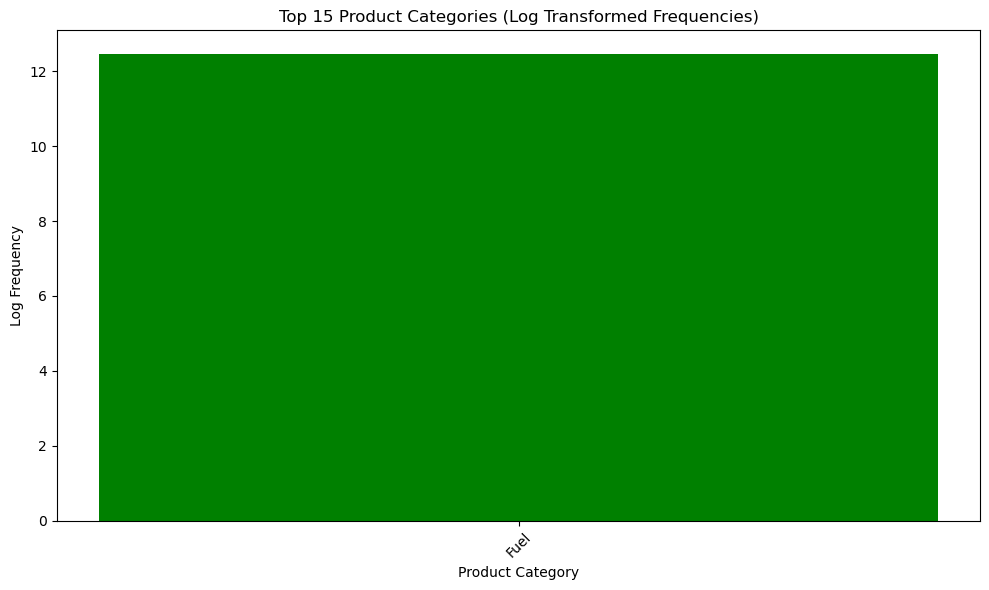

In [14]:
top_n = 15
top_frequent_products = product_frequency_sorted.head(top_n)
top_categories_log = np.log(top_frequent_products['Frequency'])

# Plotting the top 15 product categories after log transformation
plt.figure(figsize=(10, 6))
plt.bar(top_frequent_products['Product Category'], top_categories_log, color='green')
plt.xlabel('Product Category')
plt.ylabel('Log Frequency')
plt.title('Top 15 Product Categories (Log Transformed Frequencies)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
product_frequency = filtered_customer_distribution_main.groupby(['Client','Product Category']).size().reset_index(name='Frequency')

In [16]:
# Creating Product pivot
product_pivot = product_frequency.pivot_table(index='Client', columns='Product Category', fill_value=0)

In [17]:
# Doing scaling here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(product_pivot)
X_scaled=pd.DataFrame(X_scaled, columns=product_pivot.columns)

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

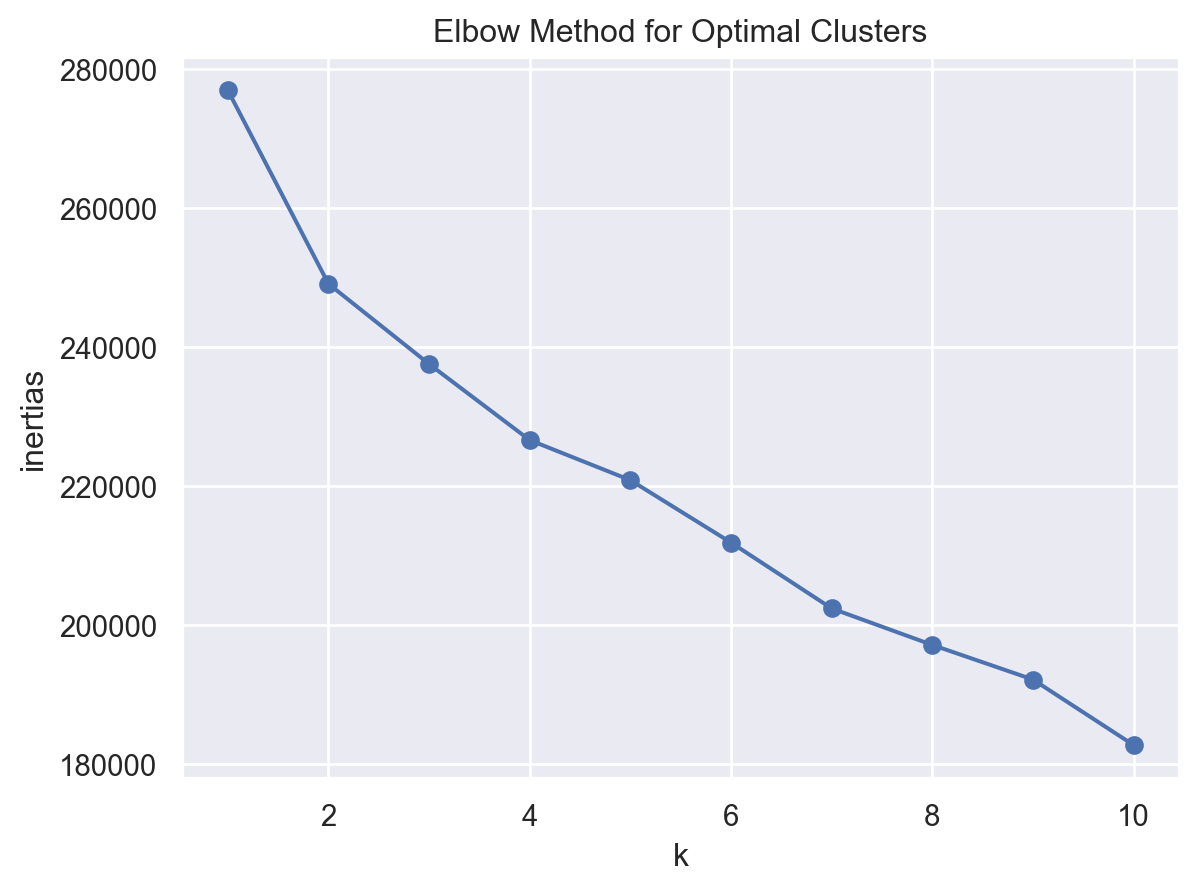

In [19]:
# Applying K means
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append([k, kmeans.inertia_])
(
    pd.DataFrame(inertias, columns=['k','inertias'])
    .pipe(so.Plot, x='k', y='inertias')
    .add(so.Line(marker='o'))
    .label(title="Elbow Method for Optimal Clusters")
)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

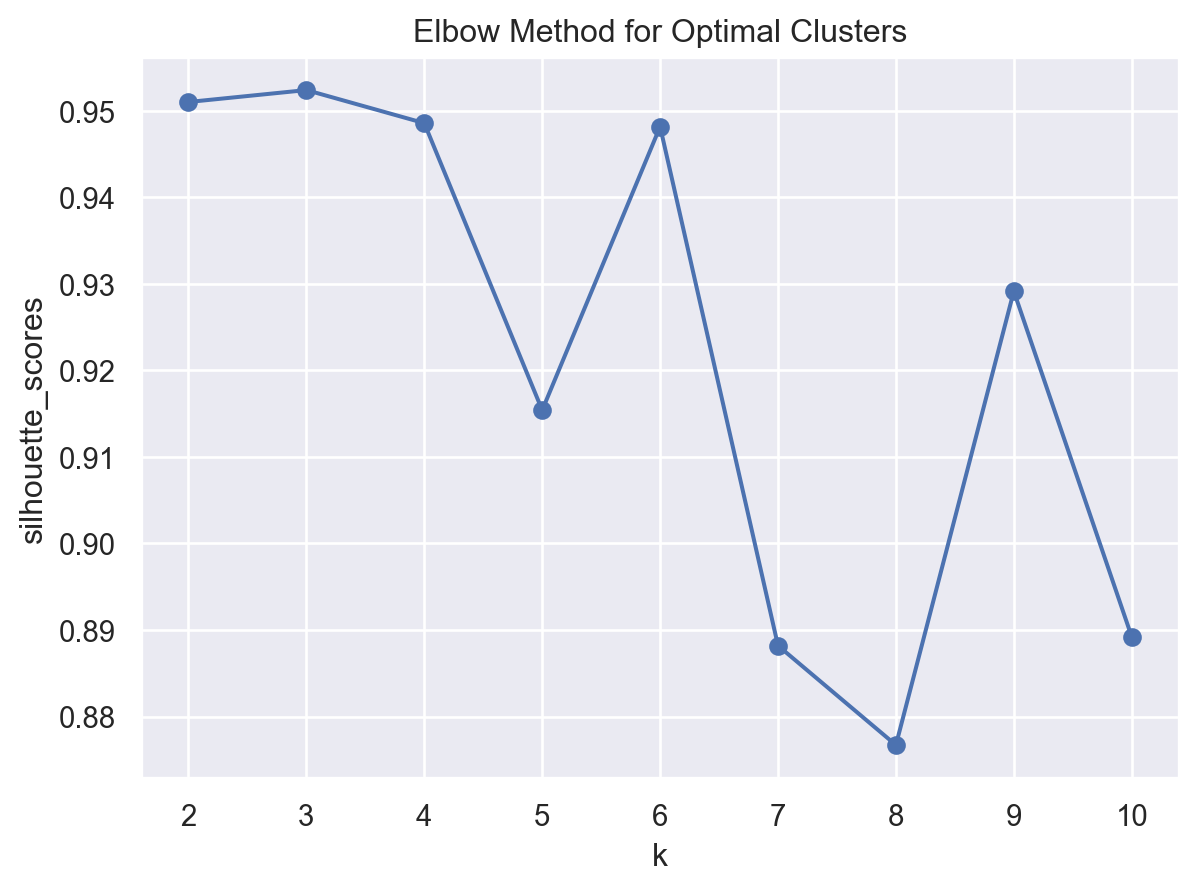

In [20]:
# Applying silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    # score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append([k,silhouette_score(X_scaled, kmeans.labels_)])

(
    pd.DataFrame(silhouette_scores, columns=['k','silhouette_scores'])
    .pipe(so.Plot, x='k', y='silhouette_scores')
    .add(so.Line(marker='o'))
    .label(title="Elbow Method for Optimal Clusters")
)

In [21]:
# Choose the best number of clusters (e.g., 3) based on the above analysis
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [22]:
product_pivot['Cluster'] = kmeans_final.labels_
cluster_summary = product_pivot.groupby('Cluster').mean()

In [23]:
# Doing the transpose
cluster_summary_transposed = cluster_summary.transpose()

In [24]:
cluster_summary_transposed = cluster_summary_transposed.apply(pd.to_numeric, errors = 'coerce')

In [25]:
if isinstance(cluster_summary_transposed.index,pd.MultiIndex):
    cluster_summary_transposed.index = [''.join(map(str,idx)) for idx in cluster_summary_transposed.index]

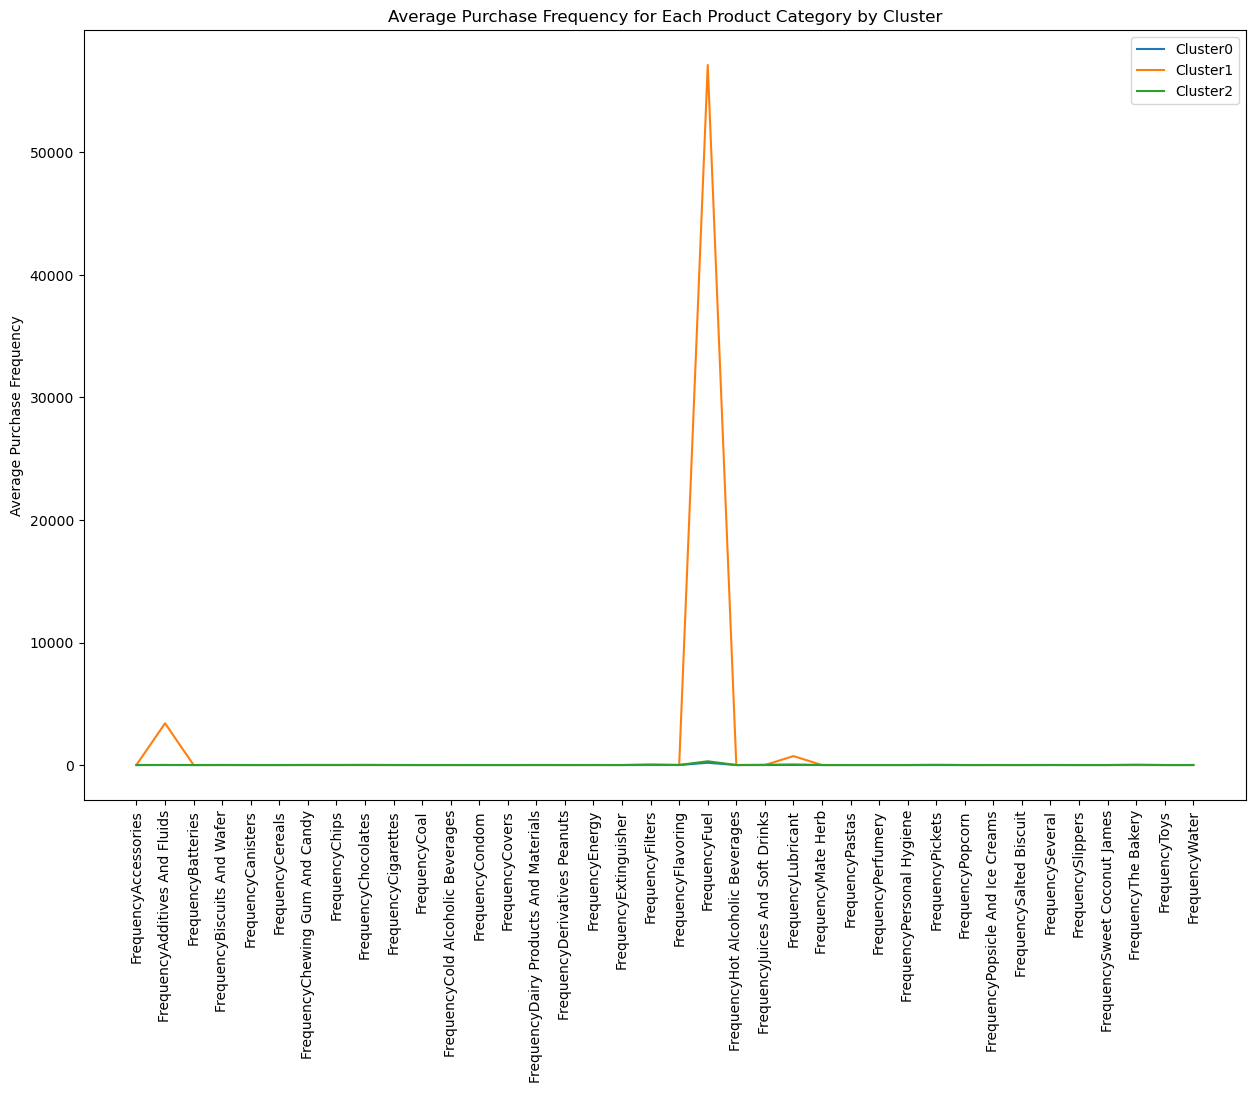

In [26]:
plt.figure(figsize=(15,10))
for cluster in cluster_summary_transposed.columns:
    plt.plot(cluster_summary_transposed.index,
            cluster_summary_transposed[cluster],
            label=f'Cluster{cluster}')
plt.xticks(rotation=90)
plt.ylabel('Average Purchase Frequency')
plt.title('Average Purchase Frequency for Each Product Category by Cluster')
plt.legend()
plt.show()

### Explaination:-'Fuel' dominates as a preferred product, indicating a targeted opportunity. Clustering reveals distinct purchase patterns, pinpointing niche segments

### Research Question 2) b) What is the average spending of customers over a specific time period

In [27]:
from matplotlib.ticker import FuncFormatter

In [28]:
# Function to convert it into millions
def millions_formattor(x, pos):
    return f'{int(x/1e6)}M'

In [29]:
X = filtered_customer_distribution_main
X['Sales Date Time'] = pd.to_datetime(X['Sales Date Time'])

C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\4164450922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sales Date Time'] = pd.to_datetime(X['Sales Date Time'])


In [30]:
monthly_spending = X.resample('M', on='Sales Date Time').sum()['Total']

C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\597135602.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_spending = X.resample('M', on='Sales Date Time').sum()['Total']


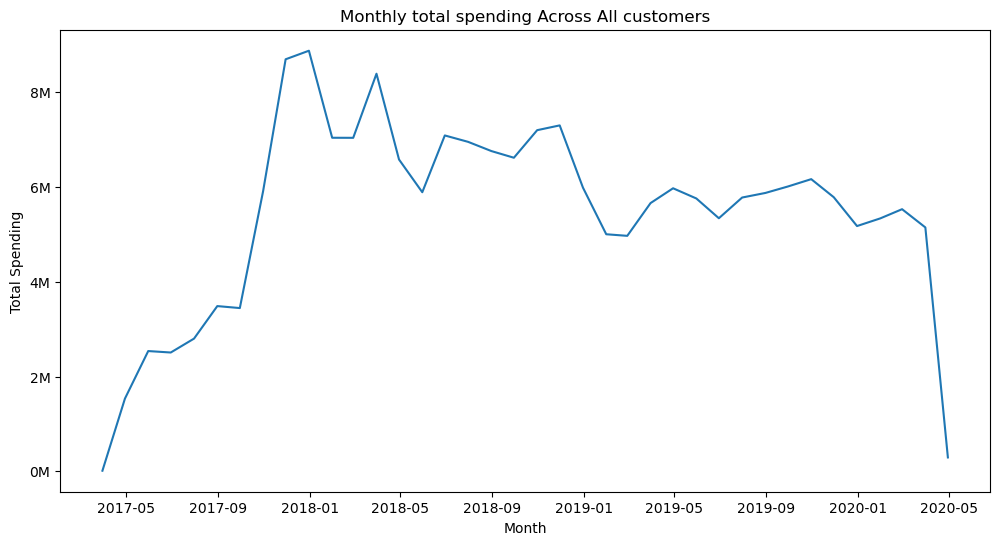

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_spending.index, y=monthly_spending.values)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattor))
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Monthly total spending Across All customers')
plt.show()

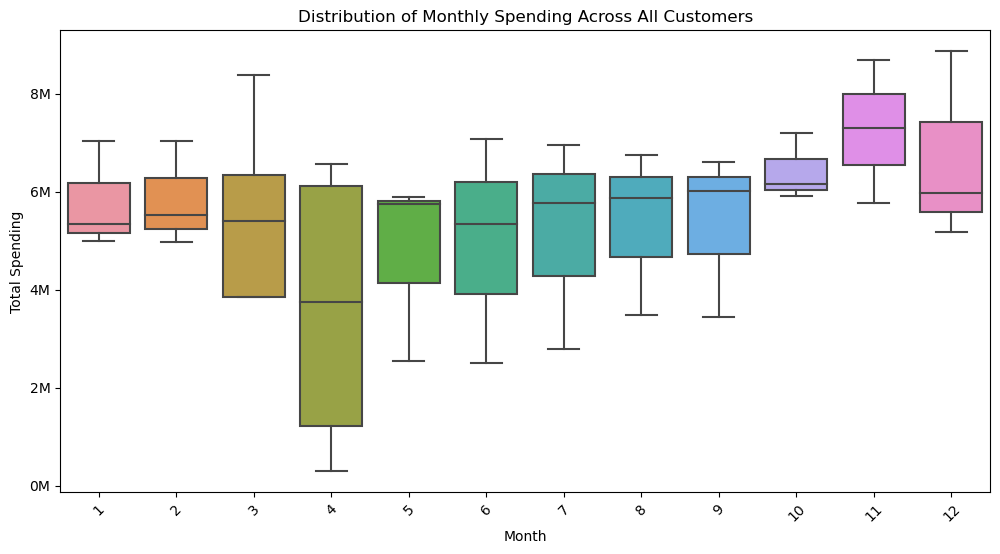

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=monthly_spending.index.month, y=monthly_spending.values,showfliers=False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattor))
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Distribution of Monthly Spending Across All Customers')
plt.xticks(rotation=45)
plt.show()

In [33]:
X = filtered_customer_distribution_main.copy()

In [34]:
X['Sales Date Time'] = pd.to_datetime(X['Sales Date Time'])

In [35]:
customer_spending = X.groupby('Client').resample('M', on='Sales Date Time').sum(numeric_only=True)['Total']

In [36]:
customer_spending_reset = customer_spending.reset_index()
customer_spending_pivot = customer_spending_reset.pivot(index='Client', columns='Sales Date Time', values='Total').fillna(0)

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_spending_pivot)
X_scaled = pd.DataFrame(X_scaled, columns=customer_spending_pivot.columns)

In [38]:
kmeans = KMeans(n_clusters=5, init='random', n_init=1, random_state=468)
kmeans.fit(X_scaled)

KMeans(init='random', n_clusters=5, n_init=1, random_state=468)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

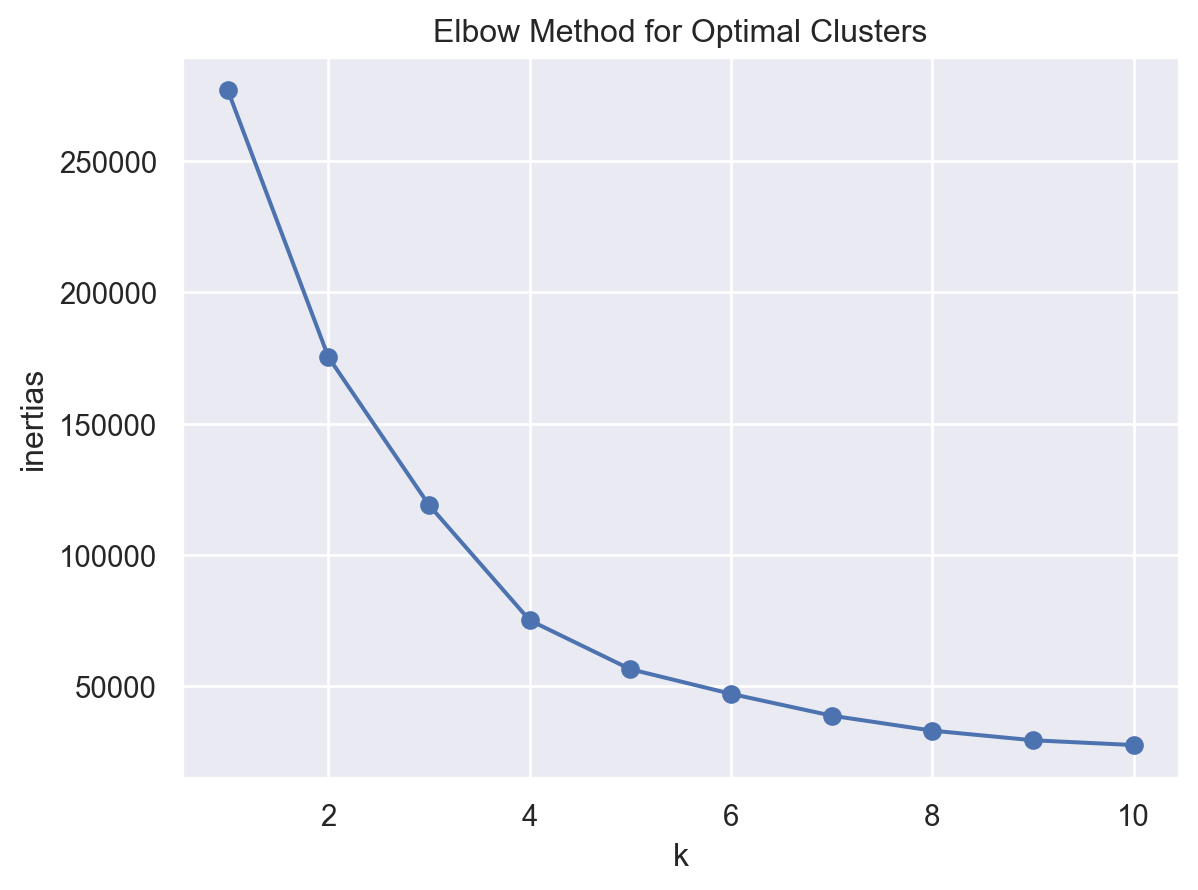

In [39]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append([k, kmeans.inertia_])
(
    pd.DataFrame(inertias, columns=['k','inertias'])
    .pipe(so.Plot, x='k', y='inertias')
    .add(so.Line(marker='o'))
    .label(title="Elbow Method for Optimal Clusters")
)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

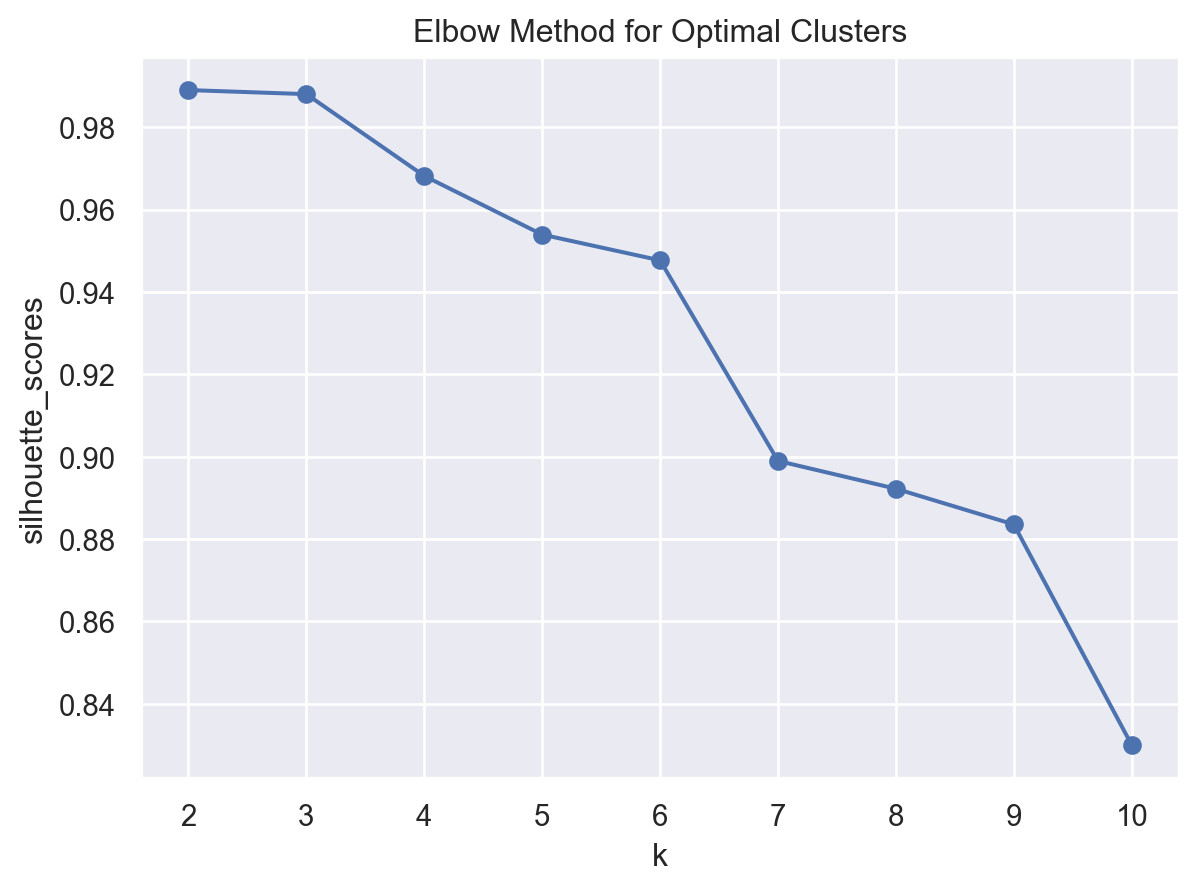

In [40]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    # score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append([k,silhouette_score(X_scaled, kmeans.labels_)])

(
    pd.DataFrame(silhouette_scores, columns=['k','silhouette_scores'])
    .pipe(so.Plot, x='k', y='silhouette_scores')
    .add(so.Line(marker='o'))
    .label(title="Elbow Method for Optimal Clusters")
)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


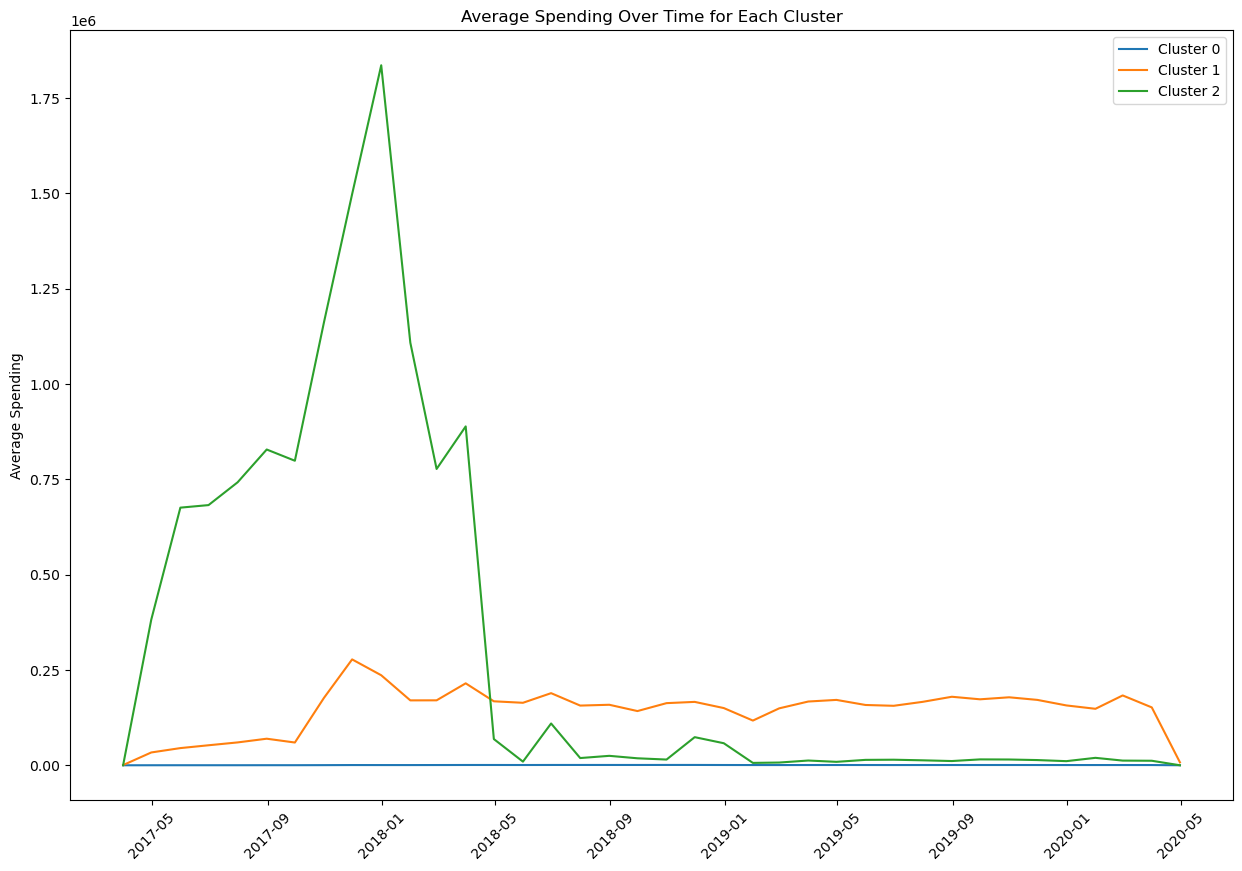

In [41]:
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

customer_spending_pivot['Cluster'] = kmeans_final.labels_

cluster_summary = customer_spending_pivot.groupby('Cluster').mean()

cluster_summary_transposed = cluster_summary.transpose()

plt.figure(figsize=(15, 10))
for cluster in cluster_summary_transposed.columns:
    plt.plot(cluster_summary_transposed.index, 
             cluster_summary_transposed[cluster], 
             label=f'Cluster {cluster}')
# plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattor))
plt.xticks(rotation=45)
plt.ylabel('Average Spending')
plt.title('Average Spending Over Time for Each Cluster')
plt.legend()
plt.show()

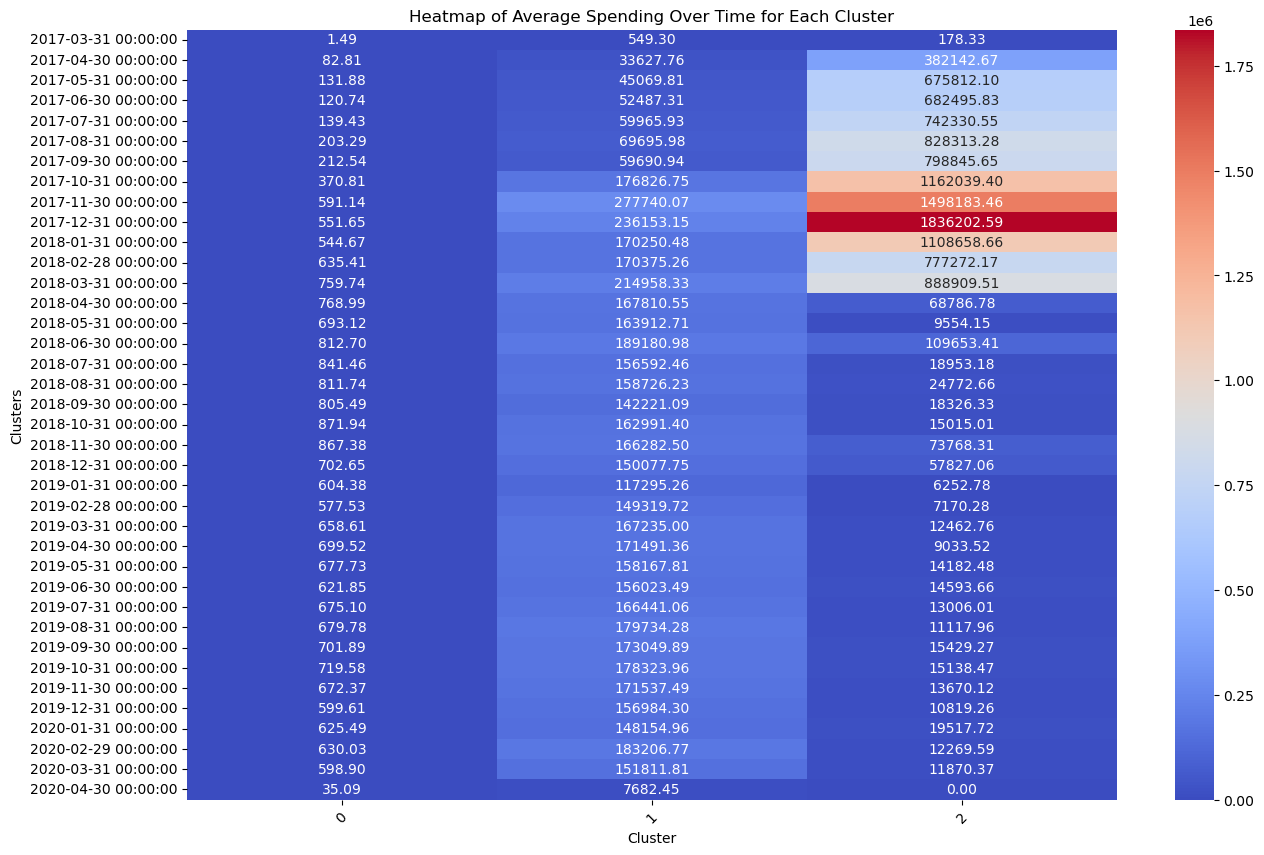

In [42]:
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(cluster_summary_transposed, annot=True, cmap='coolwarm', fmt=".2f")
# plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattor))
plt.xticks(rotation=45)
plt.ylabel('Clusters')
plt.title('Heatmap of Average Spending Over Time for Each Cluster')
plt.show()

In [43]:
cluster_variance = []
for i in range(kmeans_final.n_clusters):
    members = customer_spending_pivot[customer_spending_pivot['Cluster'] == i]
    cluster_variance.append(members.drop('Cluster', axis=1).var().mean())

In [44]:
variance_df = pd.DataFrame(cluster_variance, columns=['Variance'], index=[f'Cluster {i}' for i in range(kmeans_final.n_clusters)])

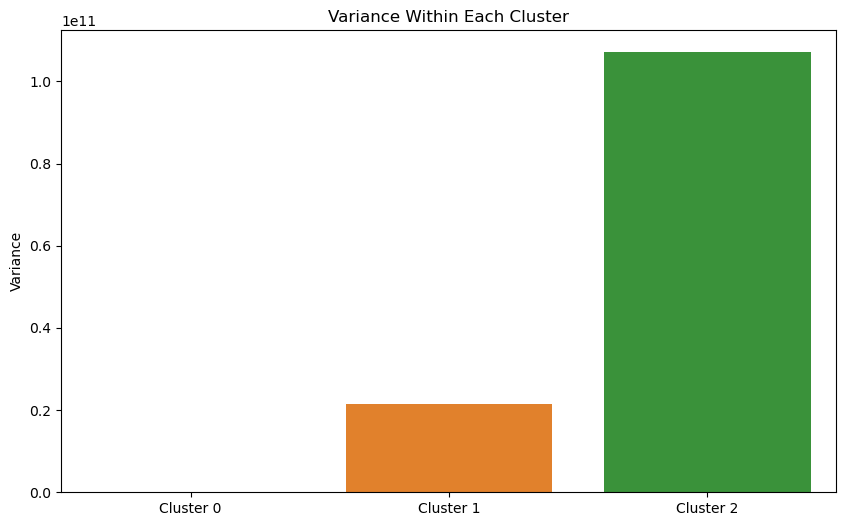

In [45]:
# Visualization of variance
plt.figure(figsize=(10, 6))
sns.barplot(x=variance_df.index, y='Variance', data=variance_df)
plt.title('Variance Within Each Cluster')
plt.show()

### Explaination:- The boxplot indicates seasonality in spending with certain months showing higher median expenditures and variability. The heatmap suggests differentiated spending behaviors within clusters, potentially driven by factors such as seasonality or promotions.

### Research Question 2) c) Which form of payment is most preferred by different segments of customers?

In [46]:
df = filtered_customer_distribution_main

In [47]:
payment_preference = df.groupby(['Client City', 'Form of Payment']).size().reset_index(name='Count')

In [48]:
payment_pivot = payment_preference.pivot_table(index='Client City',columns='Form of Payment',values='Count',fill_value=0)

In [49]:
cities = payment_pivot.index

In [50]:
forms_of_payment = payment_pivot.columns

In [51]:
date_for_plot = [payment_pivot[form_of_payment].values for form_of_payment in forms_of_payment]

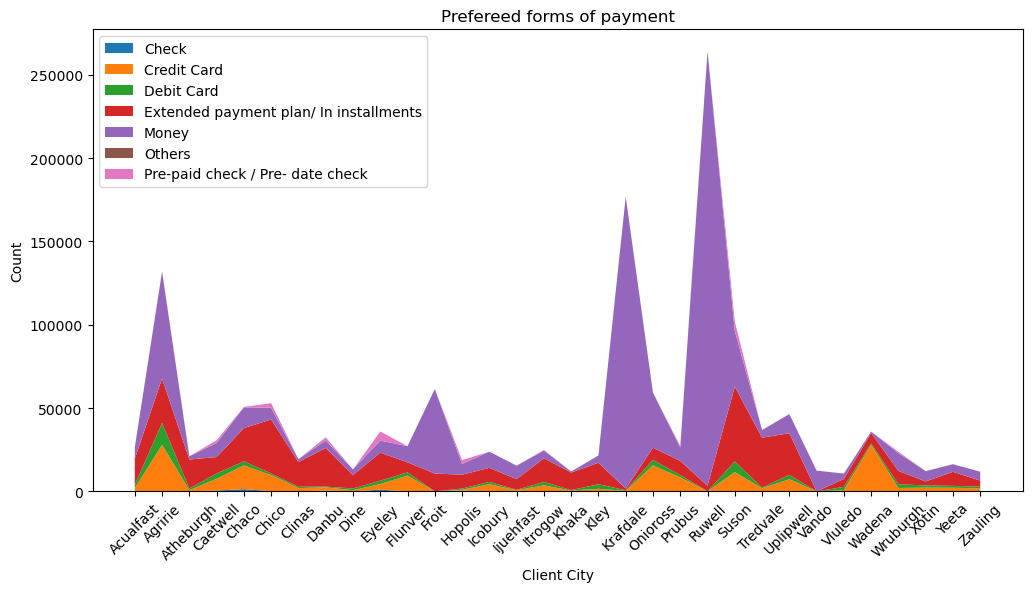

In [52]:
plt.figure(figsize=(12,6))
plt.stackplot(cities, date_for_plot, labels=forms_of_payment)
plt.xlabel('Client City')
plt.ylabel('Count')
plt.title('Prefereed forms of payment')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [53]:
df = filtered_customer_distribution_main  # Using your DataFrame

In [54]:
payment_frequency = df.groupby(['Client', 'Form of Payment']).size().reset_index(name='Frequency')

In [55]:
payment_pivot = payment_frequency.pivot_table(index='Client', columns='Form of Payment', fill_value=0)

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(payment_pivot)
X_scaled = pd.DataFrame(X_scaled, columns=payment_pivot.columns)

In [57]:

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

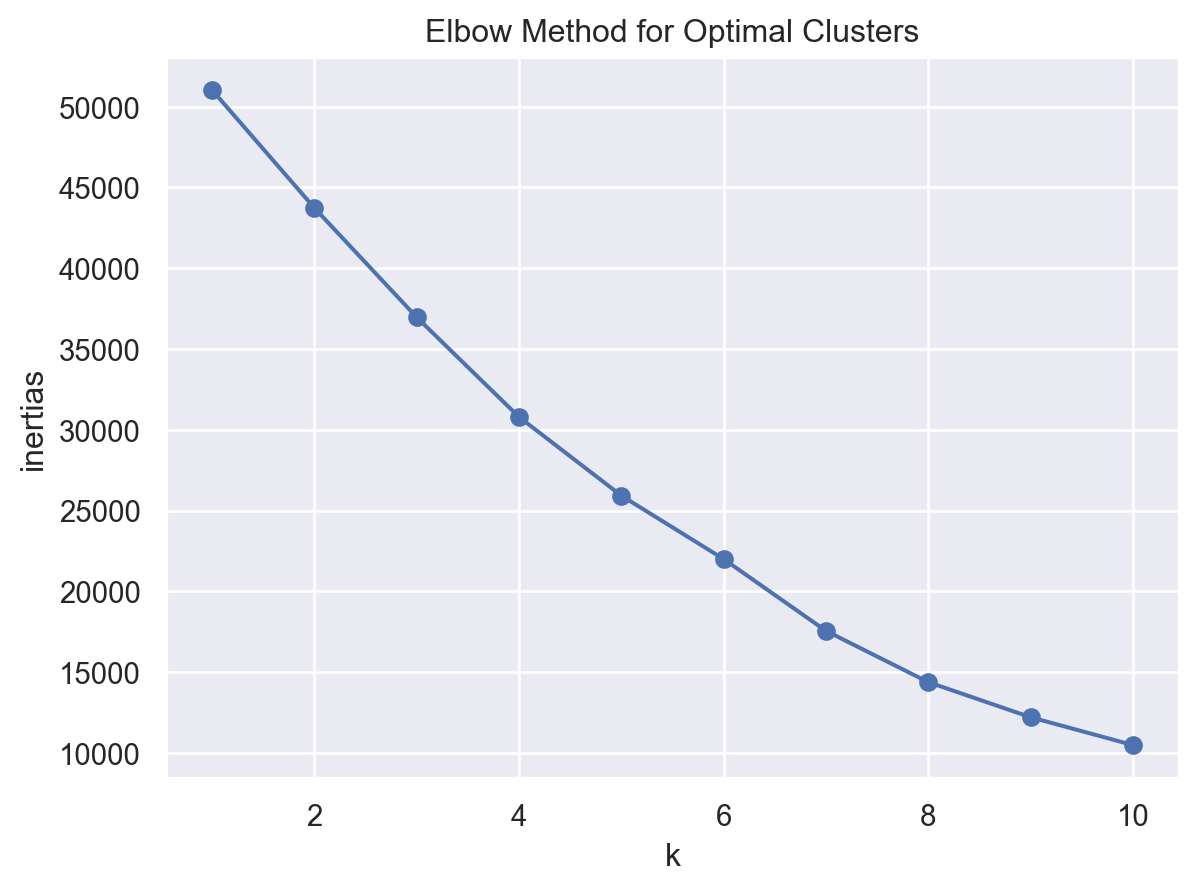

In [58]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append([k, kmeans.inertia_])
(
    pd.DataFrame(inertias, columns=['k','inertias'])
    .pipe(so.Plot, x='k', y='inertias')
    .add(so.Line(marker='o'))
    .label(title="Elbow Method for Optimal Clusters")
)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

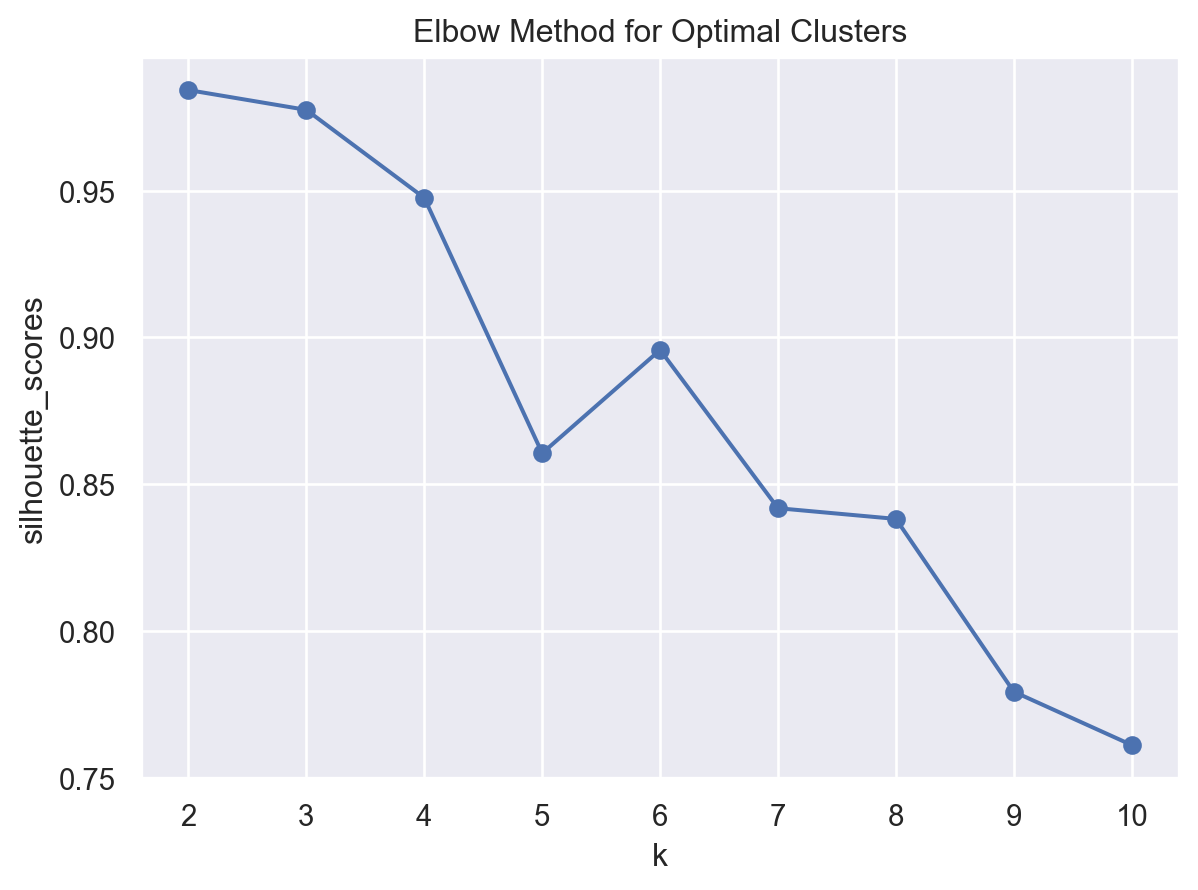

In [59]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    # score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append([k,silhouette_score(X_scaled, kmeans.labels_)])

(
    pd.DataFrame(silhouette_scores, columns=['k','silhouette_scores'])
    .pipe(so.Plot, x='k', y='silhouette_scores')
    .add(so.Line(marker='o'))
    .label(title="Elbow Method for Optimal Clusters")
)

In [60]:
best_k = 3  
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [61]:
payment_pivot['Cluster'] = kmeans_final.labels_
cluster_summary = payment_pivot.groupby('Cluster').mean()

In [62]:
cluster_summary_transposed = cluster_summary.transpose()

In [63]:
if isinstance(cluster_summary_transposed.index, pd.MultiIndex):
    cluster_summary_transposed.index = [' '.join(map(str, ind)) for ind in cluster_summary_transposed.index]
cluster_summary_transposed.columns = cluster_summary_transposed.columns.astype(str)

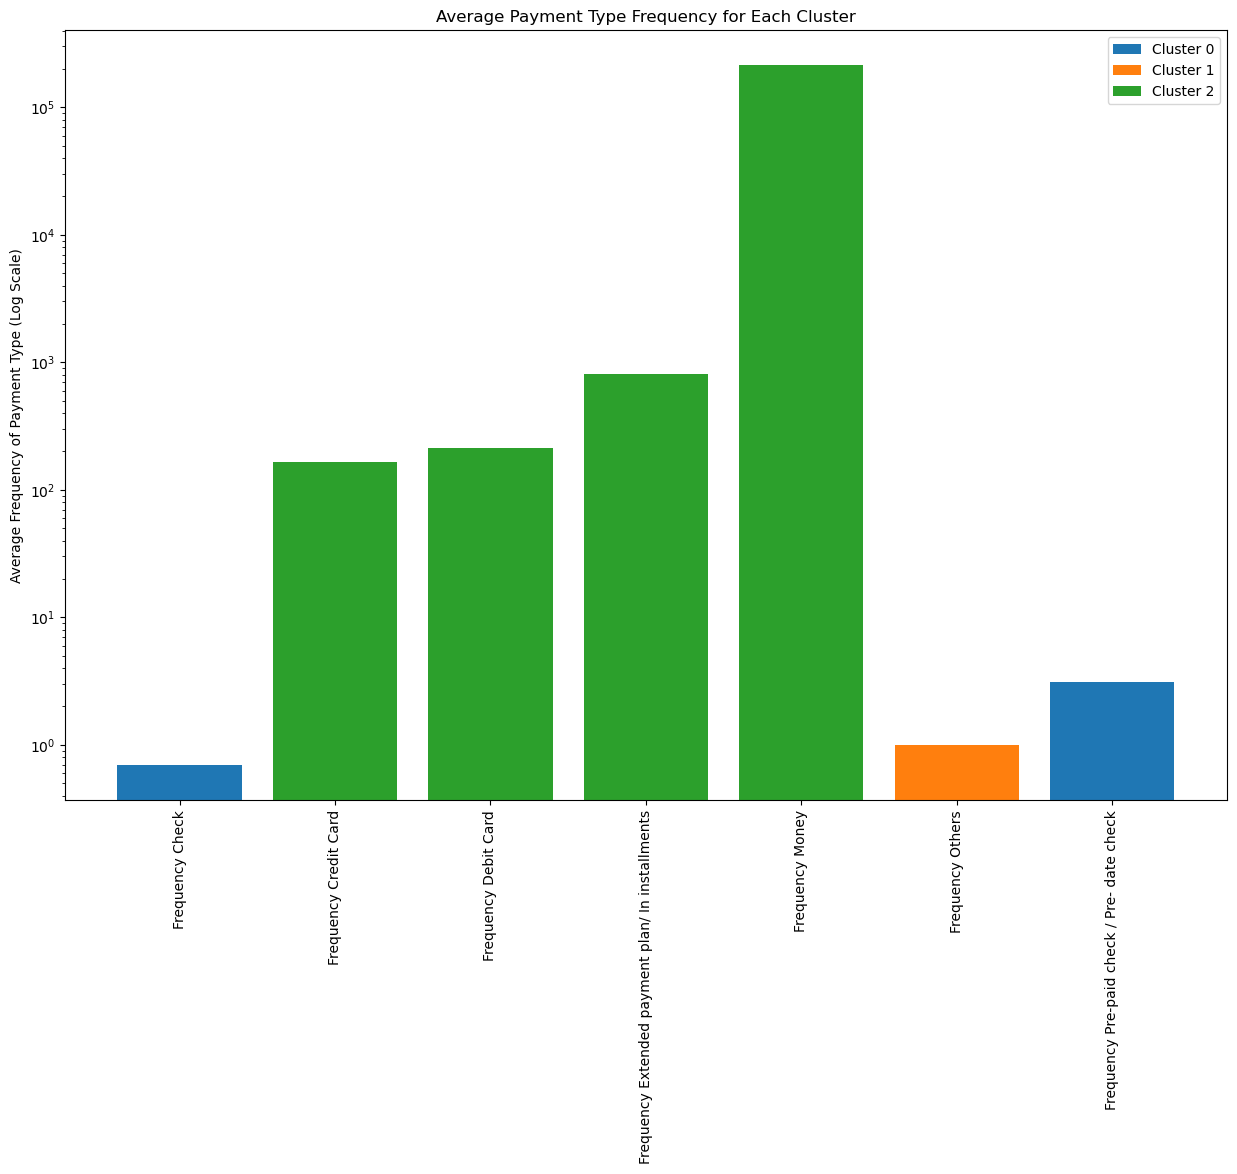

In [64]:
plt.figure(figsize=(15, 10))
for cluster in cluster_summary_transposed.columns:
    plt.bar(cluster_summary_transposed.index, 
            cluster_summary_transposed[cluster], 
            label=f'Cluster {cluster}')

plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xticks(rotation=90)
plt.ylabel('Average Frequency of Payment Type (Log Scale)')
plt.title('Average Payment Type Frequency for Each Cluster')
plt.legend()
plt.show()

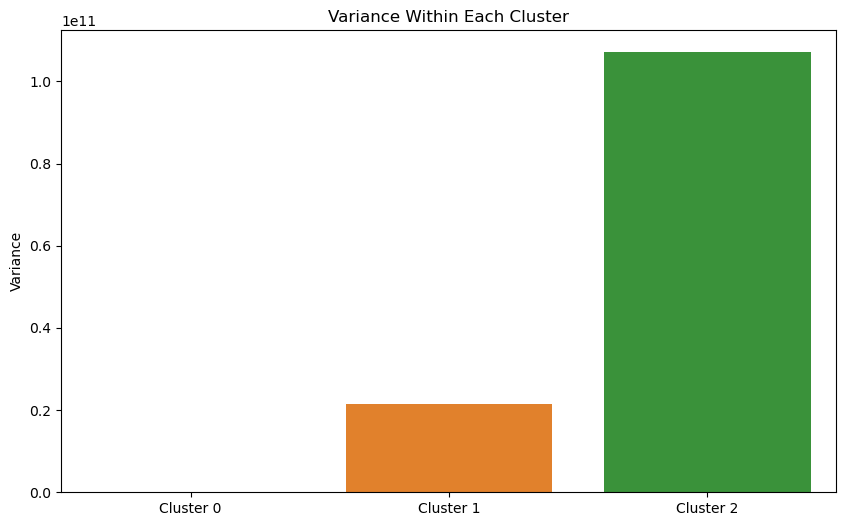

In [65]:
cluster_variance = []
for i in range(kmeans_final.n_clusters):
    members = customer_spending_pivot[customer_spending_pivot['Cluster'] == i]
    cluster_variance.append(members.drop('Cluster', axis=1).var().mean())

variance_df = pd.DataFrame(cluster_variance, columns=['Variance'], index=[f'Cluster {i}' for i in range(kmeans_final.n_clusters)])

# Visualization of variance
plt.figure(figsize=(10, 6))
sns.barplot(x=variance_df.index, y='Variance', data=variance_df)
plt.title('Variance Within Each Cluster')
plt.show()

### Explaination :- Area chart reveals credit cards as the top payment choice in key cities. Bar chart indicates Cluster 2 favors alternative payment methods, diverging from the dominant credit card preference. If a cluster has a high frequency of cash payments, a business might consider offering cash discounts to customers in that cluster to increase sales

###  Research Question 2 D) Are there specific times or dates when certain customer segments make the most purchases (e.g., weekends, holidays, end of the month)?

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df = filtered_customer_distribution_main

# Convert 'Sale Date Time' to datetime
df['Sales Date Time'] = pd.to_datetime(df['Sales Date Time'])

# Extract day of the week and hour of the day
df['Day of Week'] = df['Sales Date Time'].dt.day_name()
df['Hour of Day'] = df['Sales Date Time'].dt.hour

C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\2665600261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales Date Time'] = pd.to_datetime(df['Sales Date Time'])
C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\2665600261.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day of Week'] = df['Sales Date Time'].dt.day_name()
C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\2665600261.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [67]:
# Aggregate sales by day of the week
sales_by_day = df.groupby('Day of Week')['Total'].sum()

# Order the days for the plot
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(ordered_days)

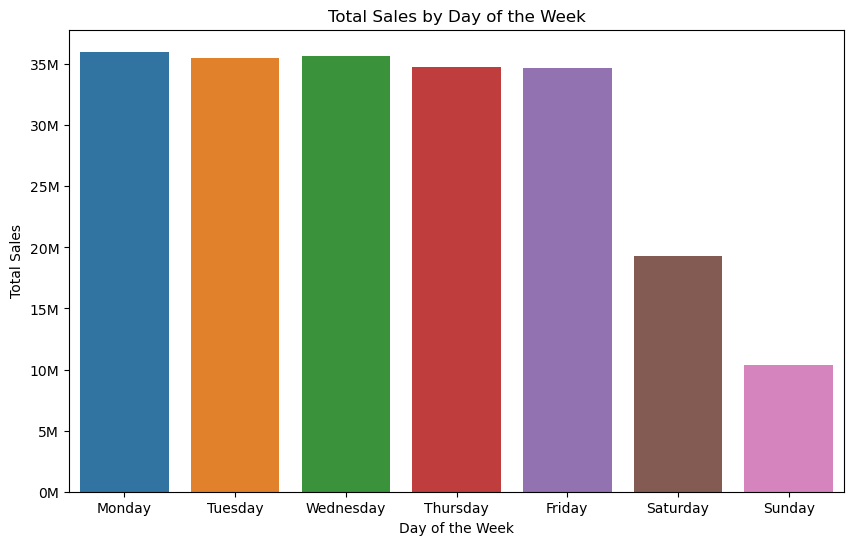

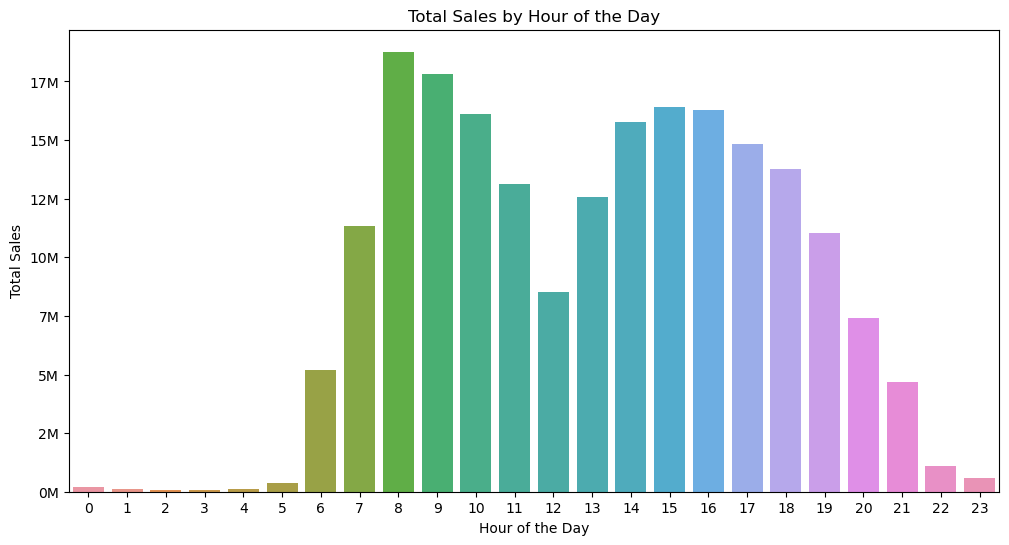

In [68]:
# Plotting sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattor))
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of the Week')
plt.show()

# Aggregate sales by hour of the day
sales_by_hour = df.groupby('Hour of Day')['Total'].sum()

# Plotting sales by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formattor))
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of the Day')
plt.xticks(range(0, 24))
plt.show()

In [69]:
df = filtered_customer_distribution_main.copy()
# Convert 'Sale Date Time' to datetime and extract time features
df['Sales Date Time'] = pd.to_datetime(df['Sales Date Time'])
df['Day of Week'] = df['Sales Date Time'].dt.dayofweek  # 0: Monday, 6: Sunday
df['Hour of Day'] = df['Sales Date Time'].dt.hour

In [70]:
time_frequency = df.groupby(['Client', 'Day of Week', 'Hour of Day']).size().reset_index(name='Frequency')

time_pivot = time_frequency.pivot_table(index='Client', columns=['Day of Week', 'Hour of Day'], fill_value=0)

# Flatten MultiIndex columns for KMeans
time_pivot.columns = ['DOW_' + str(col[0]) + '_HOD_' + str(col[1]) for col in time_pivot.columns.values]

In [71]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(time_pivot)
X_scaled = pd.DataFrame(X_scaled, columns=time_pivot.columns)

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

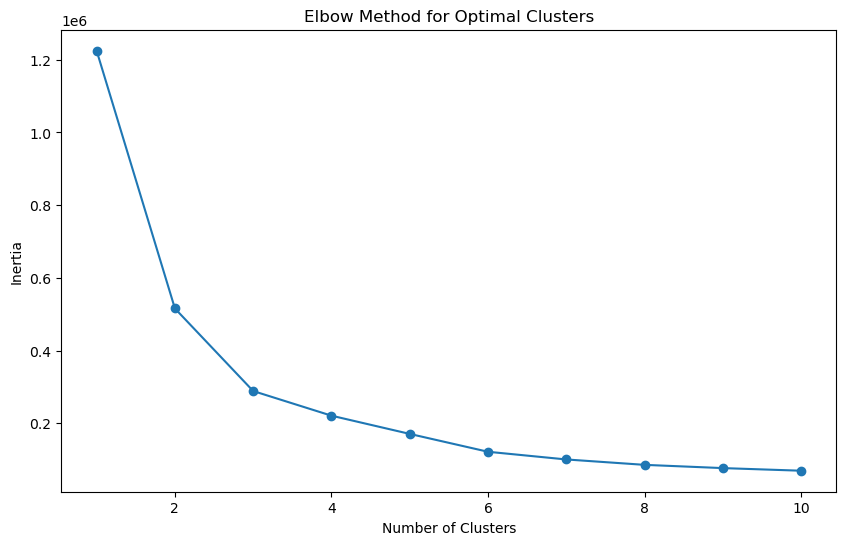

In [72]:
# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

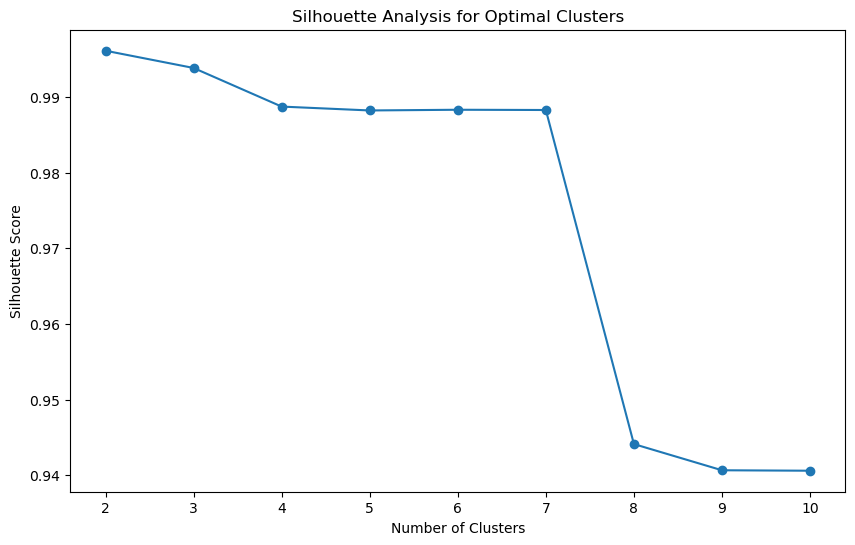

In [73]:

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Analysis
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


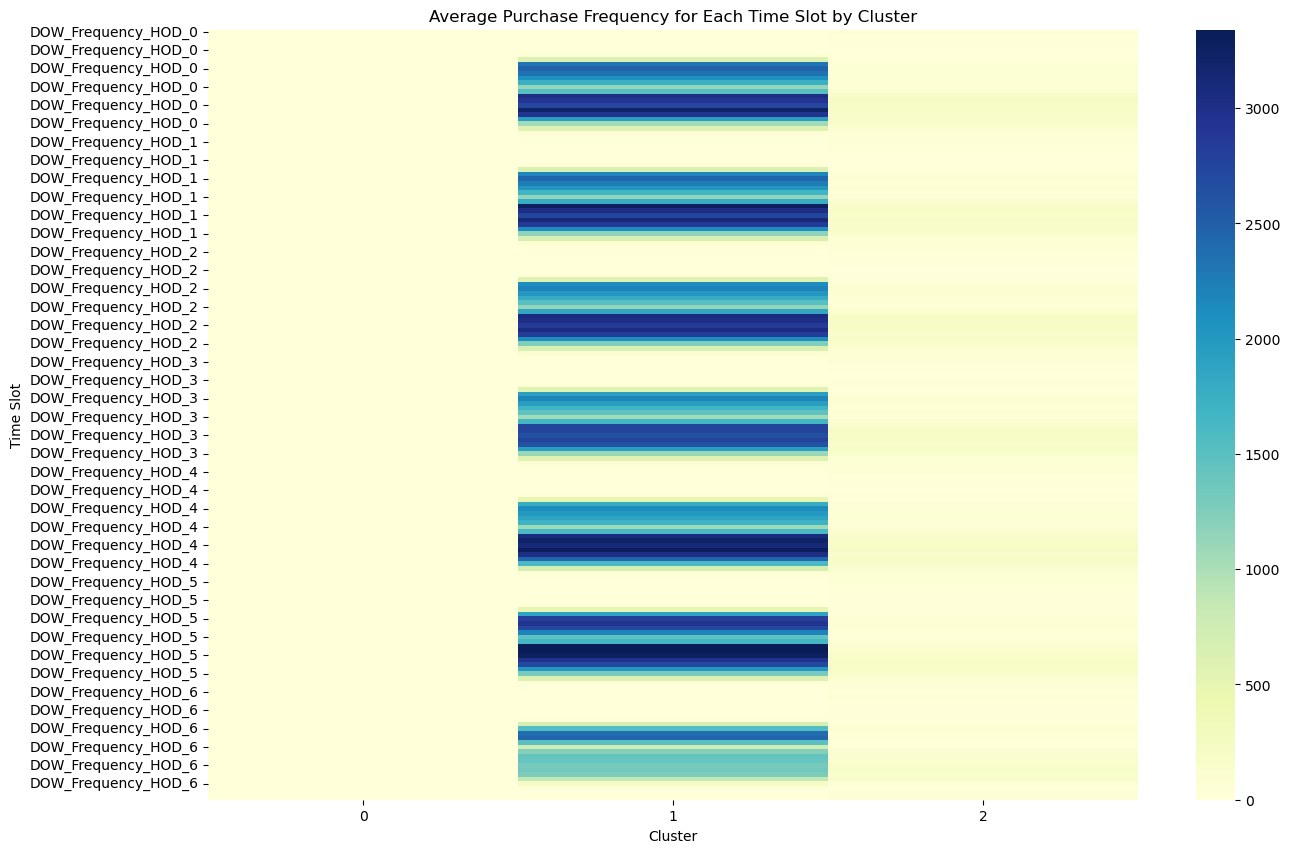

In [74]:
best_k = 3  
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

# Add the cluster labels to the DataFrame
time_pivot['Cluster'] = kmeans_final.labels_


cluster_summary = time_pivot.groupby('Cluster').mean()


cluster_summary_transposed = cluster_summary.transpose()

plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary_transposed, cmap="YlGnBu")
plt.xlabel('Cluster')
plt.ylabel('Time Slot')
plt.title('Average Purchase Frequency for Each Time Slot by Cluster')
plt.show()

### Explaination :- Total Sales by Day of the Week:There is a clear pattern indicating that sales vary by day of the week. Typically, to see trends like higher sales on weekends or specific weekdays due to shopping habits. data seems to show that sales on some days like Wednesday and Thursday are significantly higher than on others. This is indicatating a trend or a regular event that prompts sales on these days, such as a weekly discount day.

### Total Sales by Hour of the Day:Sales appear to peak at certain times of the day. This could be useful for targeted advertising or staffing decisions. For example, if sales peak in the late afternoon, this could inform store hours or the timing of daily promotions.There's a noticeable drop in sales during the very early hours, which is expected, but there's also a dip in the mid-afternoon before sales pick up again towards the evening.

### Average Purchase Frequency for Each Time Slot by Cluster:The heatmap indicates the frequency of purchases for different time slots across the clusters. It can help identify specific times when certain customer segments (as divided into clusters) are most active.We can observe which clusters are more active at which times of the day or days of the week.

### Research Question 3) a) Are there customer segments that specifically prefer products from the Fuel category?

In [75]:
df = filtered_customer_distribution_main

In [76]:
#checking the number of unique values for the categorical variables
cat_names = ['Employee','Product','Product Category','Client','Client City']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Employee 891
Product 1979
Product Category 38
Client 7290
Client City 32


In [77]:
#improting the required libraries and filtering to only fuel data
import pandas as pd

fuel_data = df[df['Product Category'] == 'Fuel']

In [78]:
# Calculate the count of each product within the 'Fuel' category
popular_fuel_products = fuel_data['Product'].value_counts().reset_index()
popular_fuel_products.columns = ['Product', 'Purchase Count']

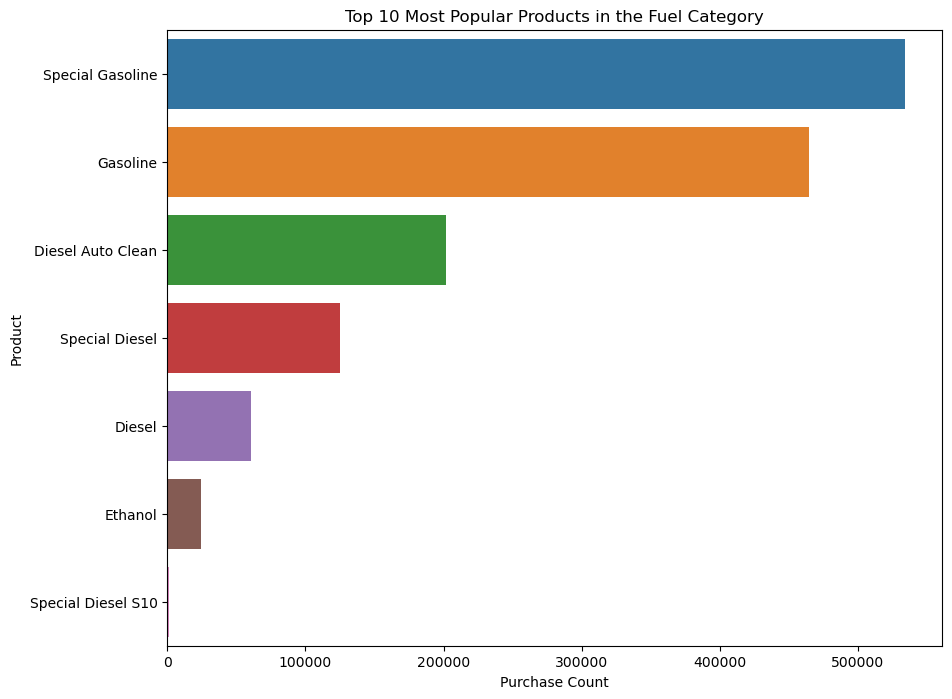

In [79]:
# Plotting the most popular products in the 'Fuel' category
plt.figure(figsize=(10, 8))
sns.barplot(x='Purchase Count', y='Product', data=popular_fuel_products.head(10))
plt.title('Top 10 Most Popular Products in the Fuel Category')
plt.xlabel('Purchase Count')
plt.ylabel('Product')
plt.show()

### Research Question 4) b) Which product categories are most popular among different customer segments?

In [80]:
# Counting the occurrences of each product category
top_categories = df['Product Category'].value_counts().head(10)

top_categories

Fuel                      1411580
Lubricant                   21334
Additives And Fluids         6750
Filters                      3889
Flavoring                    2139
The Bakery                   1441
Juices And Soft Drinks       1110
Pickets                      1036
Accessories                   893
Chocolates                    866
Name: Product Category, dtype: int64

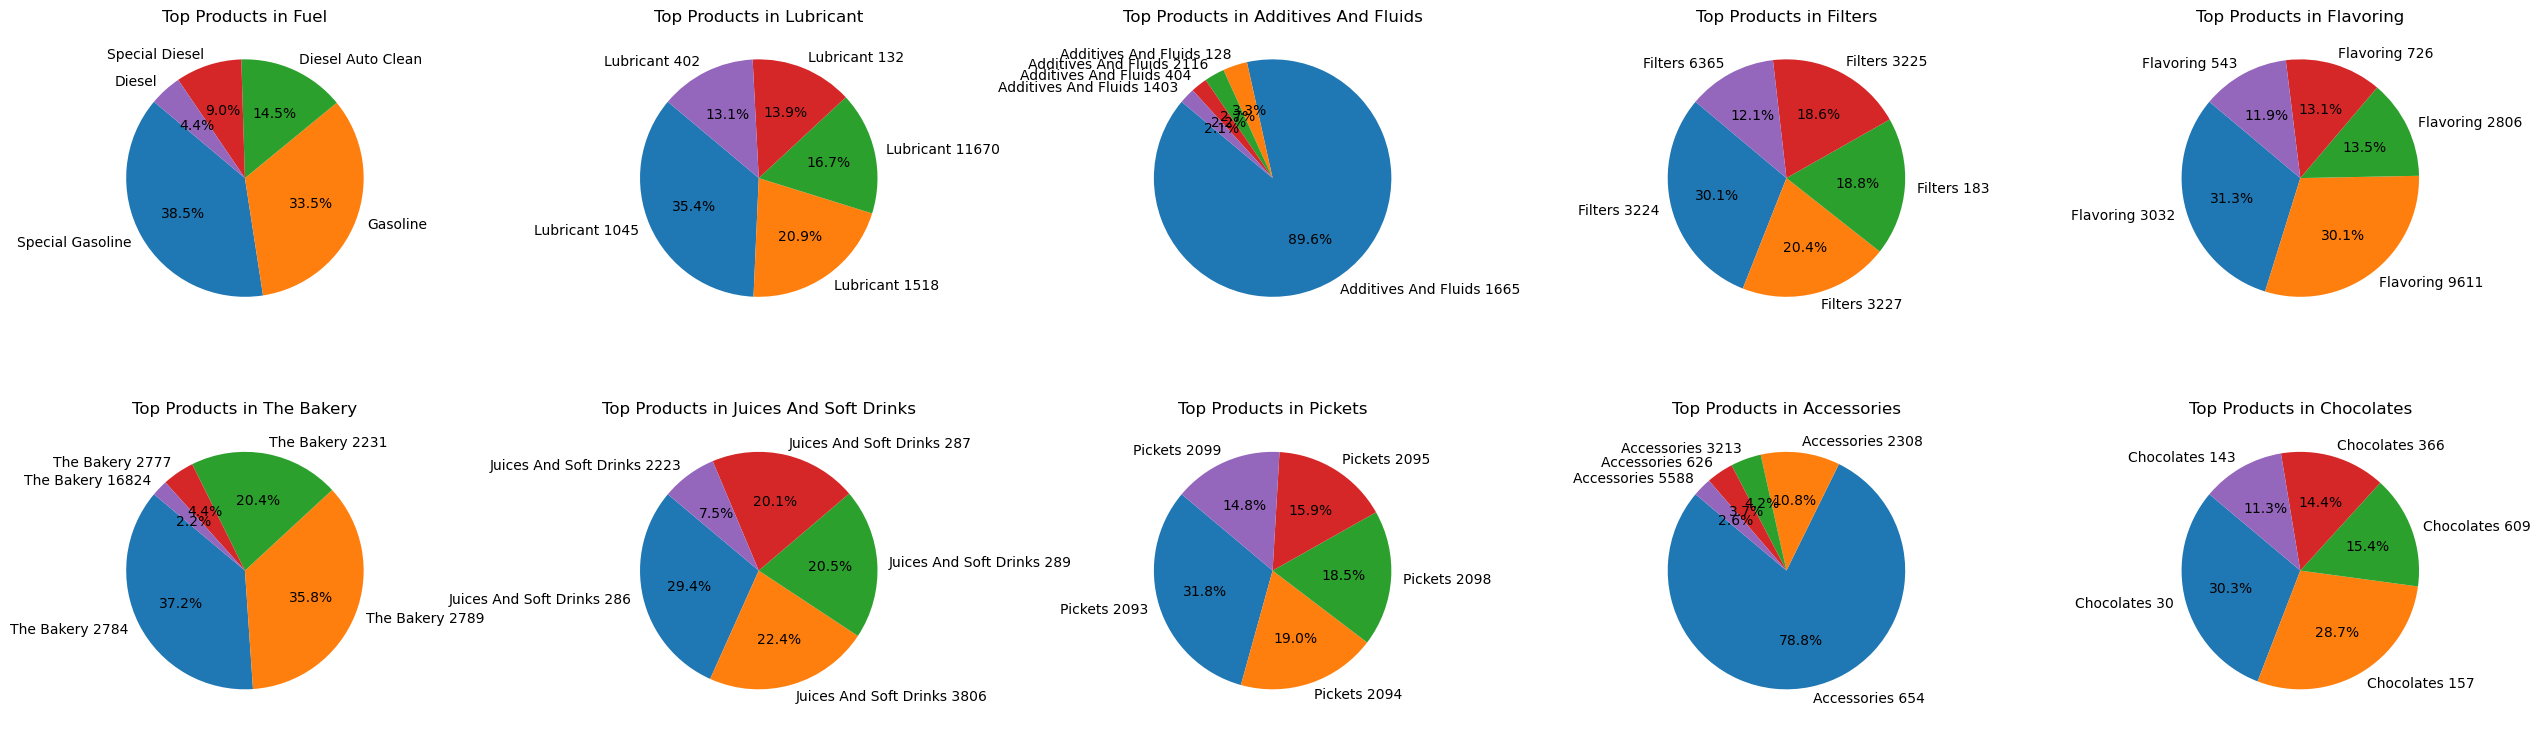

In [81]:
#import matplotlib.pyplot as plt

top_categories_list = top_categories.index.tolist()
num_top_categories = len(top_categories_list)

num_cols = min(5, num_top_categories)
num_rows = (num_top_categories - 1) // num_cols + 1
fig_width = num_cols * 5
fig_height = num_rows * 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))
if num_rows > 1:
    axes = axes.flatten()
for i, category in enumerate(top_categories_list):

    category_data = df[df['Product Category'] == category]
    top_products = category_data['Product'].value_counts().head(5)
    axes[i].pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_aspect('equal')
    axes[i].set_title(f'Top Products in {category}')

for i in range(num_top_categories, num_rows * num_cols):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Research Quetsion 4) c) Are there segments that buy products across multiple categories frequently?

In [82]:
#implementing apriori algorithm to generate frequent itemsets
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
one_hot_encoded = pd.get_dummies(df['Product Category'])

frequent_itemsets = apriori(one_hot_encoded, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules)

C:\Users\shubh\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [83]:
#filtering the association rules for cross-category purchases
cross_category_purchases = rules[
    (rules['antecedents'].apply(lambda x: len(x)) > 1) &
    (rules['consequents'].apply(lambda x: len(x)) > 1)
]
print(cross_category_purchases)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [84]:
#one-hot encoding the variables and applying apriori algorithm to generate frequent itemsets
one_hot_encoded = pd.get_dummies(df['Product Category'])
one_hot_encoded['Client'] = df['Client']
transactions = one_hot_encoded.groupby('Client').sum().applymap(lambda x: 1 if x > 0 else 0)
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(transactions, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules)

                antecedents                    consequents  \
0             (Accessories)                         (Fuel)   
1                    (Fuel)                  (Accessories)   
2               (Lubricant)                  (Accessories)   
3             (Accessories)                    (Lubricant)   
4    (Additives And Fluids)                      (Filters)   
..                      ...                            ...   
159       (Lubricant, Fuel)             (Pickets, Filters)   
160               (Pickets)     (Lubricant, Filters, Fuel)   
161               (Filters)     (Pickets, Lubricant, Fuel)   
162             (Lubricant)       (Pickets, Filters, Fuel)   
163                  (Fuel)  (Pickets, Filters, Lubricant)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.050892            0.997257  0.050754    0.997305  1.000048   
1              0.997257            0.050892  0.050754    0.050894  1.000048   
2              0.3

C:\Users\shubh\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\shubh\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


C:\Users\shubh\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\shubh\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



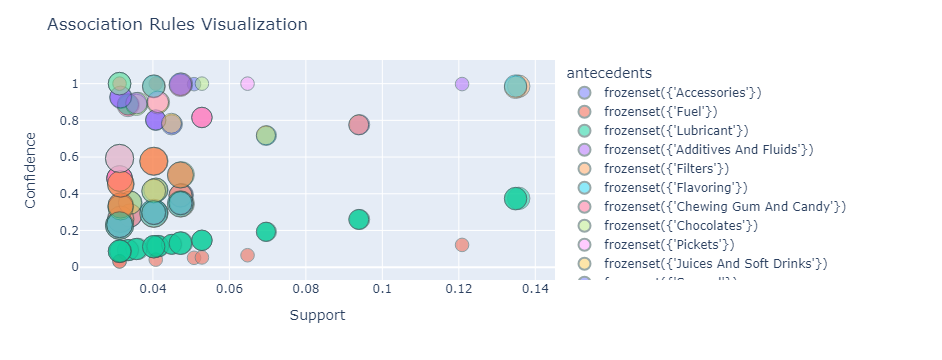

In [85]:
#plotting a graph to visualize the assiciation rules
import plotly.express as px
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules['rule'] = rules['antecedents_str'] + ' --> ' + rules['consequents_str']
fig = px.scatter(rules, x='support', y='confidence', size='lift', hover_name='rule',color='antecedents',
                 hover_data={'lift': True, 'confidence': True, 'support': True},
                 labels={'support': 'Support', 'confidence': 'Confidence', 'lift': 'Lift'})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),opacity=0.7,
                  selector=dict(mode='markers'))
fig.update_layout(title='Association Rules Visualization',
                  xaxis=dict(title='Support'),
                  yaxis=dict(title='Confidence'))
fig.show()

In [101]:
#calculating the total purchase for fuel with respect to each city
citywise_fuel_purchase = fuel_data.groupby('Client City')['Amount'].sum().reset_index()
citywise_fuel_purchase = citywise_fuel_purchase.rename(columns={'Amount': 'Total Fuel Purchase'})
print(citywise_fuel_purchase)

   Client City  Total Fuel Purchase
0    Acualfast           965325.099
1      Agririe          4808542.916
2    Atheburgh           939925.216
3     Caetwell          1719666.693
4        Chaco          2575190.275
5        Chico          2123581.429
6       Clinas           774976.008
7        Danbu          2507007.639
8         Dine           698469.459
9       Eyeley          3070528.575
10     Flunver           927640.589
11       Froit          4039109.450
12     Hopolis          1148927.386
13     Icobury          1251312.471
14   Ijuehfast           505315.389
15     Itrogow          1735695.233
16       Khaka           686966.515
17        Kley          1176720.340
18    Krafdale          2664270.741
19    Onioross          1892469.114
20      Prubus           838812.411
21      Ruwell          4477319.786
22       Suson          5737945.731
23    Tredvale          3180626.530
24   Uplipwell          3536876.120
25       Vando           181386.440
26     Vluledo           452

C:\Users\shubh\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\shubh\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



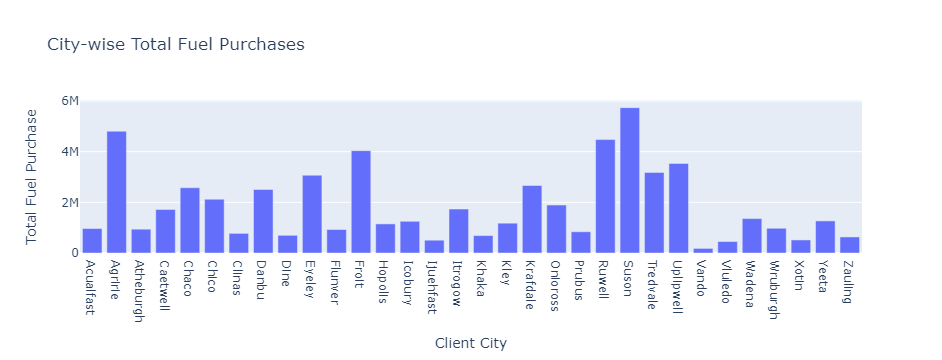

In [104]:
#plotting the city-wise fuel purchases
fig = px.bar(citywise_fuel_purchase, x='Client City', y='Total Fuel Purchase',
             labels={'Total Fuel Purchase': 'Total Fuel Purchase', 'Client City': 'Client City'},
             title='City-wise Total Fuel Purchases')
fig.show()

In [102]:
#populating the top product categories
top_categories = df['Product Category'].value_counts().head(10)
print(top_categories)

Fuel                      1411580
Lubricant                   21334
Additives And Fluids         6750
Filters                      3889
Flavoring                    2139
The Bakery                   1441
Juices And Soft Drinks       1110
Pickets                      1036
Accessories                   893
Chocolates                    866
Name: Product Category, dtype: int64


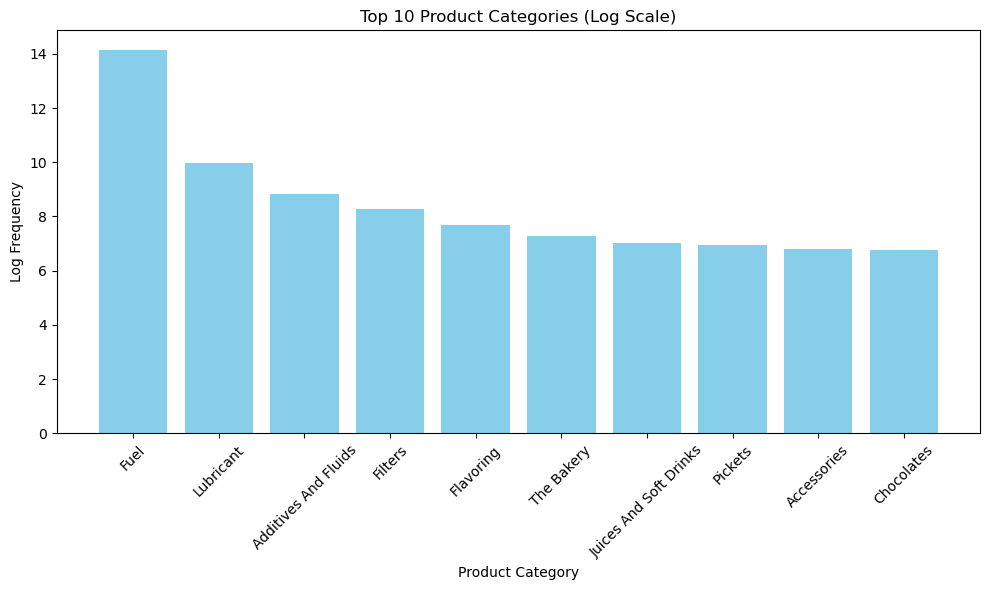

In [103]:
#visualizing the top 10 product categories
#we are normalizing the frequency to a logarithmic scale to create a better visualization and avoid relative differences as fuel is most purchased
top_categories_log = np.log(top_categories)
plt.figure(figsize=(10, 6))
plt.bar(top_categories_log.index, top_categories_log, color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Log Frequency')
plt.title('Top 10 Product Categories (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Research Question 4) a) Which customer segments are more driven by discounts and offers

In [90]:
df = filtered_customer_distribution_main
average_discount_by_city = df.groupby('Client City')['Discount Amount'].mean().reset_index()

In [91]:
average_discount_by_city = average_discount_by_city.sort_values(by='Discount Amount', ascending=False)

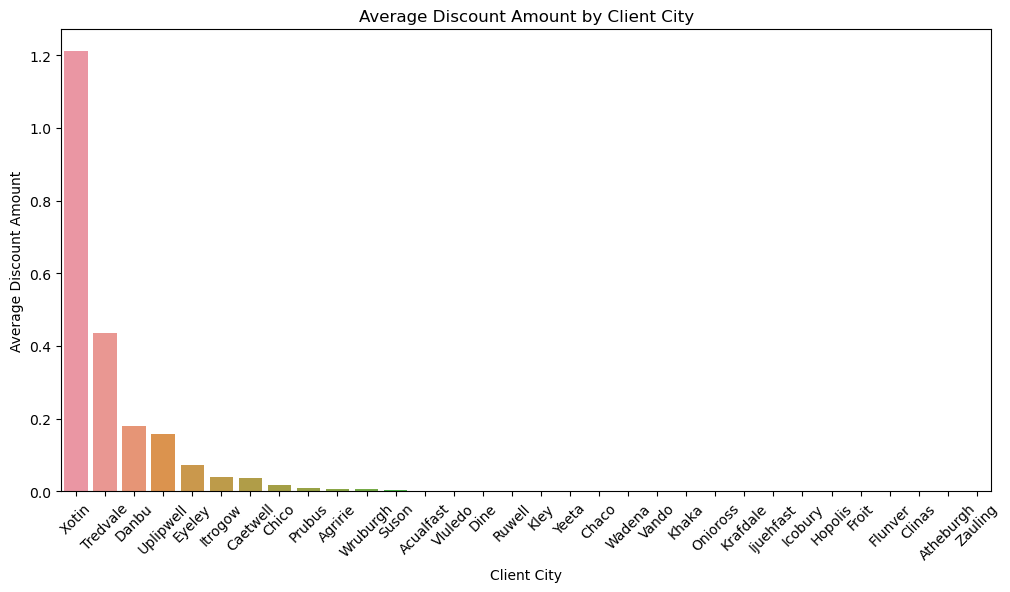

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Client City', y='Discount Amount', data=average_discount_by_city)
plt.xlabel('Client City')
plt.ylabel('Average Discount Amount')
plt.title('Average Discount Amount by Client City')
plt.xticks(rotation=45)
plt.show()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = filtered_customer_distribution_main.copy()

df['Discount Utilized'] = df['Discount Amount'] > 0

# Group by 'Client' and potentially other features like 'Product Category'
discount_frequency = df.groupby(['Client', 'Product Category'])['Discount Utilized'].mean().reset_index()

# Pivot the table
discount_pivot = discount_frequency.pivot_table(index='Client', columns='Product Category', values='Discount Utilized', fill_value=0)

discount_pivot.columns = ['Category_' + str(col) for col in discount_pivot.columns.values]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(discount_pivot)
X_scaled = pd.DataFrame(X_scaled, columns=discount_pivot.columns)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

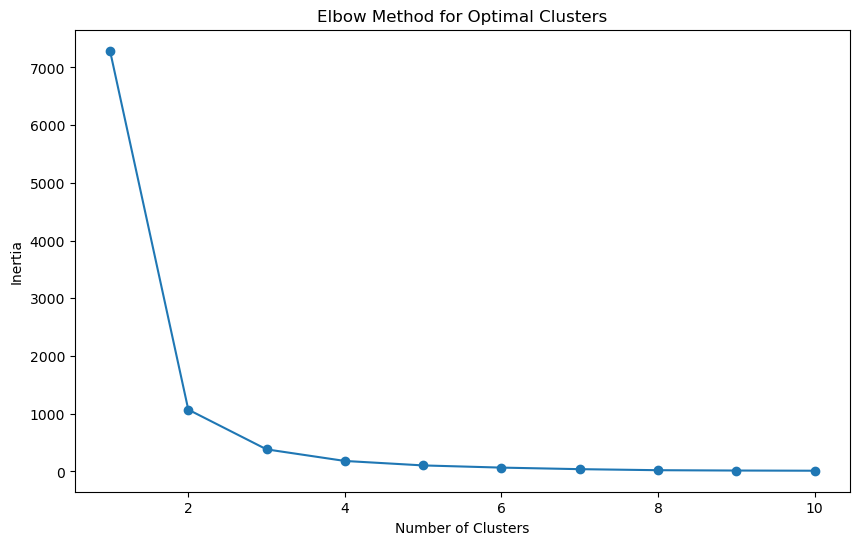

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

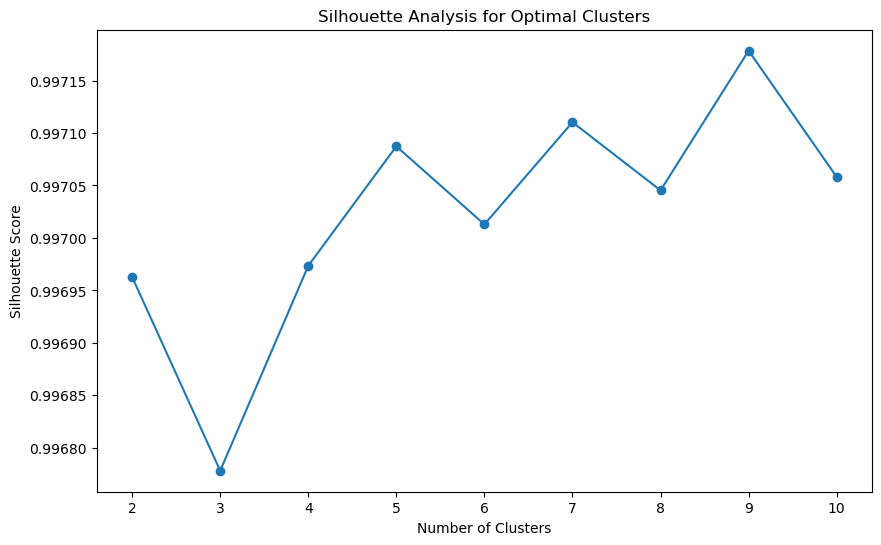

In [94]:
# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Analysis
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



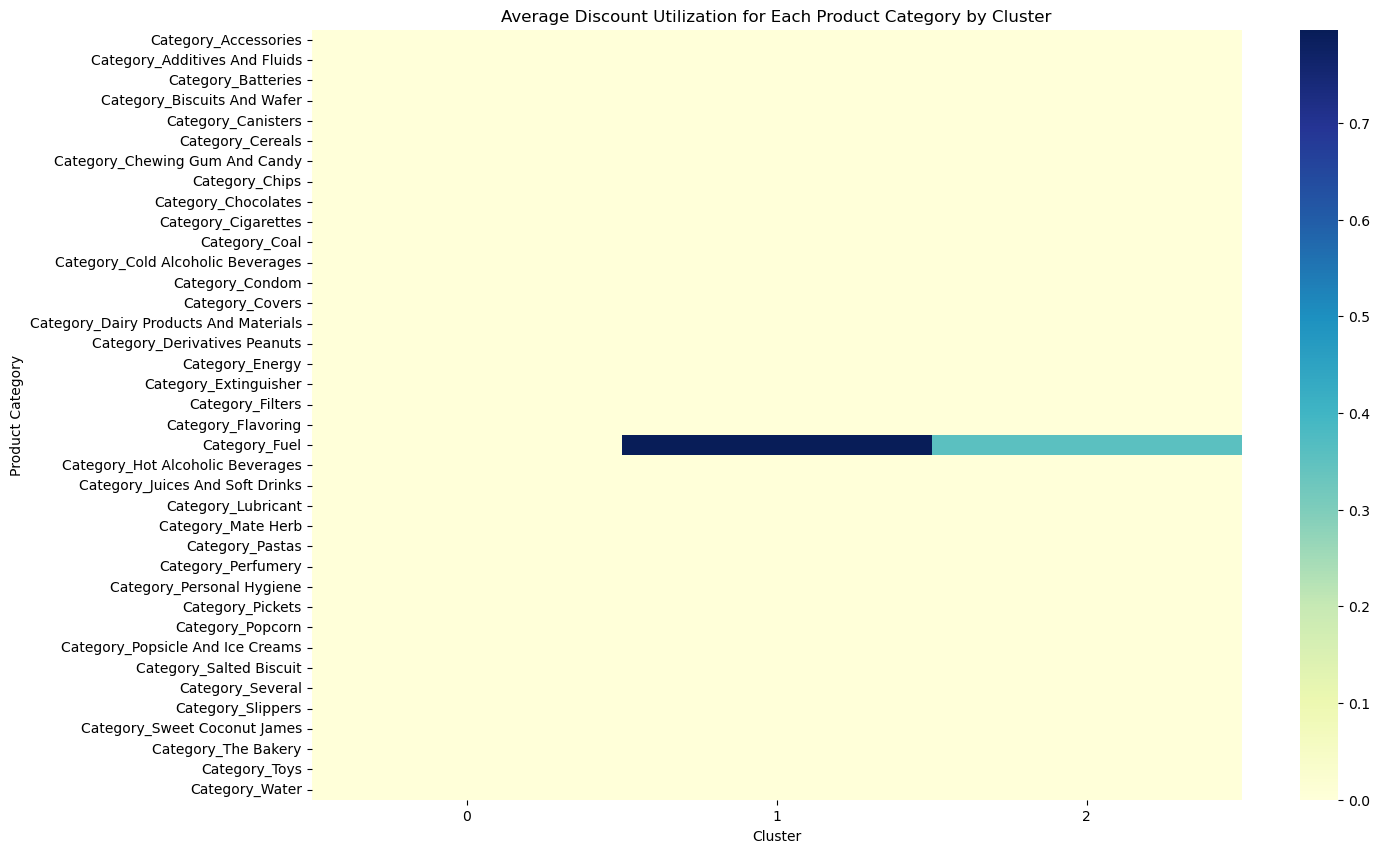

In [95]:
best_k = 3  
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

discount_pivot['Cluster'] = kmeans_final.labels_

cluster_summary = discount_pivot.groupby('Cluster').mean()

# Visualization: Plotting the mean discount utilization for each category in each cluster
cluster_summary_transposed = cluster_summary.transpose()

plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary_transposed, cmap="YlGnBu")
plt.xlabel('Cluster')
plt.ylabel('Product Category')
plt.title('Average Discount Utilization for Each Product Category by Cluster')
plt.show()

### Explaination:- The chart displays significant variation in average discount amounts by city, suggesting a localized response to pricing strategies Discount utilization across product categories varies by cluster, indicating distinct discount sensitivities among different customer segments


### Research Question Q 4 b) How does discount availed correlate with the total spending for different segments?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = filtered_customer_distribution_main 


segment_data = df.groupby('Client City').agg(Total_Discount=('Discount Amount', 'sum'), 
                                             Total_Spending=('Total', 'sum')).reset_index()

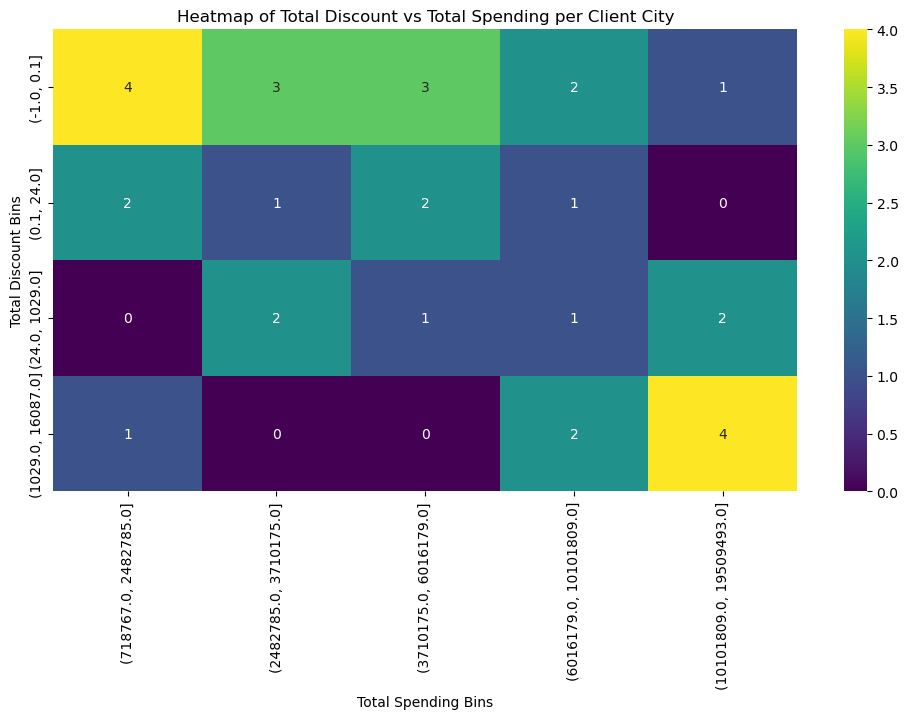

In [97]:
# Bin the data
segment_data['Discount_Bin'] = pd.qcut(segment_data['Total_Discount'], q=5, duplicates='drop', precision=0)
segment_data['Spending_Bin'] = pd.qcut(segment_data['Total_Spending'], q=5, duplicates='drop', precision=0)

# Create a pivot table for the heatmap
heatmap_data = segment_data.groupby(['Discount_Bin', 'Spending_Bin']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Total Discount vs Total Spending per Client City')
plt.xlabel('Total Spending Bins')
plt.ylabel('Total Discount Bins')
plt.show()

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = filtered_customer_distribution_main.copy()  

client_data = df.groupby('Client').agg(Average_Discount_Utilized=('Discount Amount', lambda x: (x > 0).mean()),
                                       Total_Spending=('Total', 'sum')).reset_index()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(client_data[['Average_Discount_Utilized', 'Total_Spending']])
X_scaled = pd.DataFrame(X_scaled, columns=['Average_Discount_Utilized', 'Total_Spending'])


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

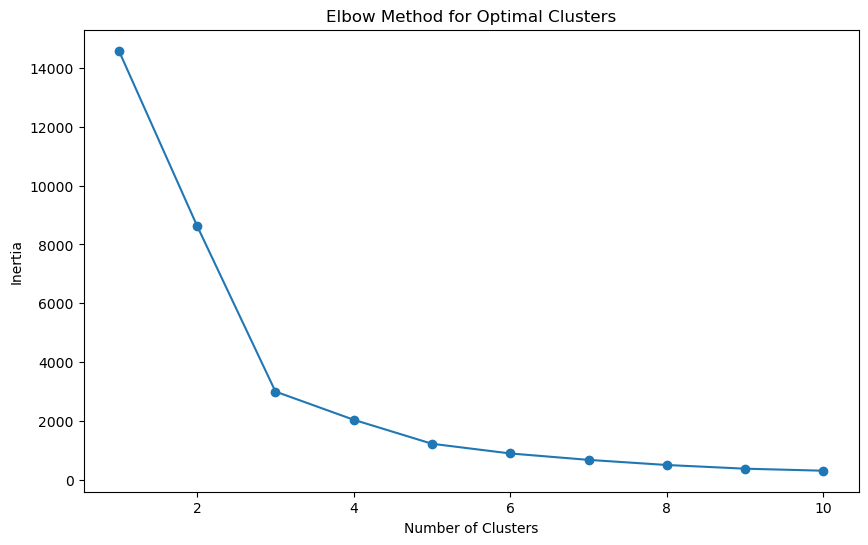

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

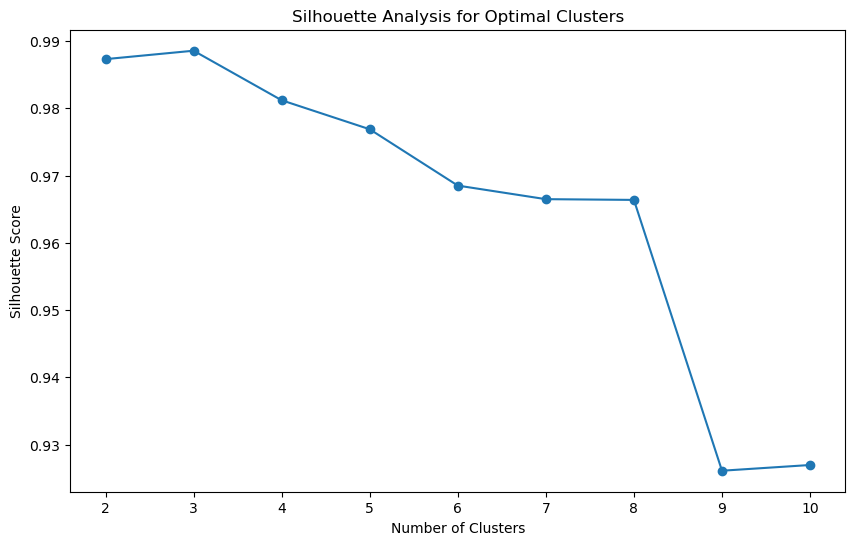

In [99]:
# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\shubh\AppData\Local\Temp\ipykernel_20180\2078370926.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



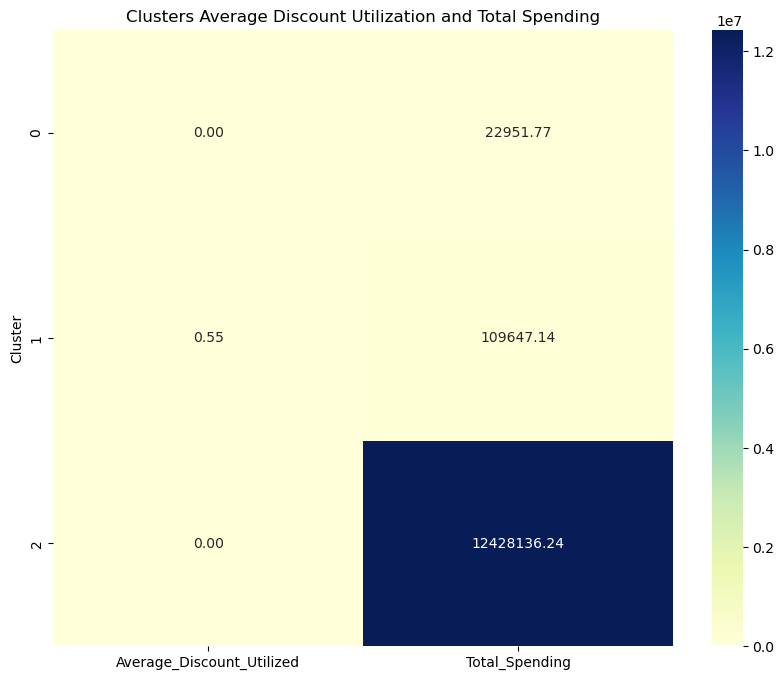

In [100]:
best_k = 3 # Best k is where silhouette score is max
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)


client_data['Cluster'] = kmeans_final.labels_

cluster_summary = client_data.groupby('Cluster').mean()

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Clusters Average Discount Utilization and Total Spending')
plt.ylabel('Cluster')
plt.show()

### Explaination:- Heatmaps reveal a correlation between discount utilization and spending by client city and customer cluster. Certain clusters show a marked preference for discounts, impacting total spending.